In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# IMPORT DATASET

In [2]:
df = pd.read_excel('cancer_patient _data _sets.xlsx')

In [3]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.count()

Patient Id                  1000
Age                         1000
Gender                      1000
Air Pollution               1000
Alcohol use                 1000
Dust Allergy                1000
OccuPational Hazards        1000
Genetic Risk                1000
chronic Lung Disease        1000
Balanced Diet               1000
Obesity                     1000
Smoking                     1000
Passive Smoker              1000
Chest Pain                  1000
Coughing of Blood           1000
Fatigue                     1000
Weight Loss                 1000
Shortness of Breath         1000
Wheezing                    1000
Swallowing Difficulty       1000
Clubbing of Finger Nails    1000
Frequent Cold               1000
Dry Cough                   1000
Snoring                     1000
Level                       1000
dtype: int64

# EXPLORATORY DATA ANALYSIS AND CLEANING OF AGE FEATURE

In [5]:
minAge = df['Age'].min()
maxAge = df['Age'].max()
print(f'Minimum age is {minAge} and maximum age is {maxAge}')


Minimum age is 14 and maximum age is 73


In [6]:
df['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    2
997    2
998    2
999    1
Name: Gender, Length: 1000, dtype: int64

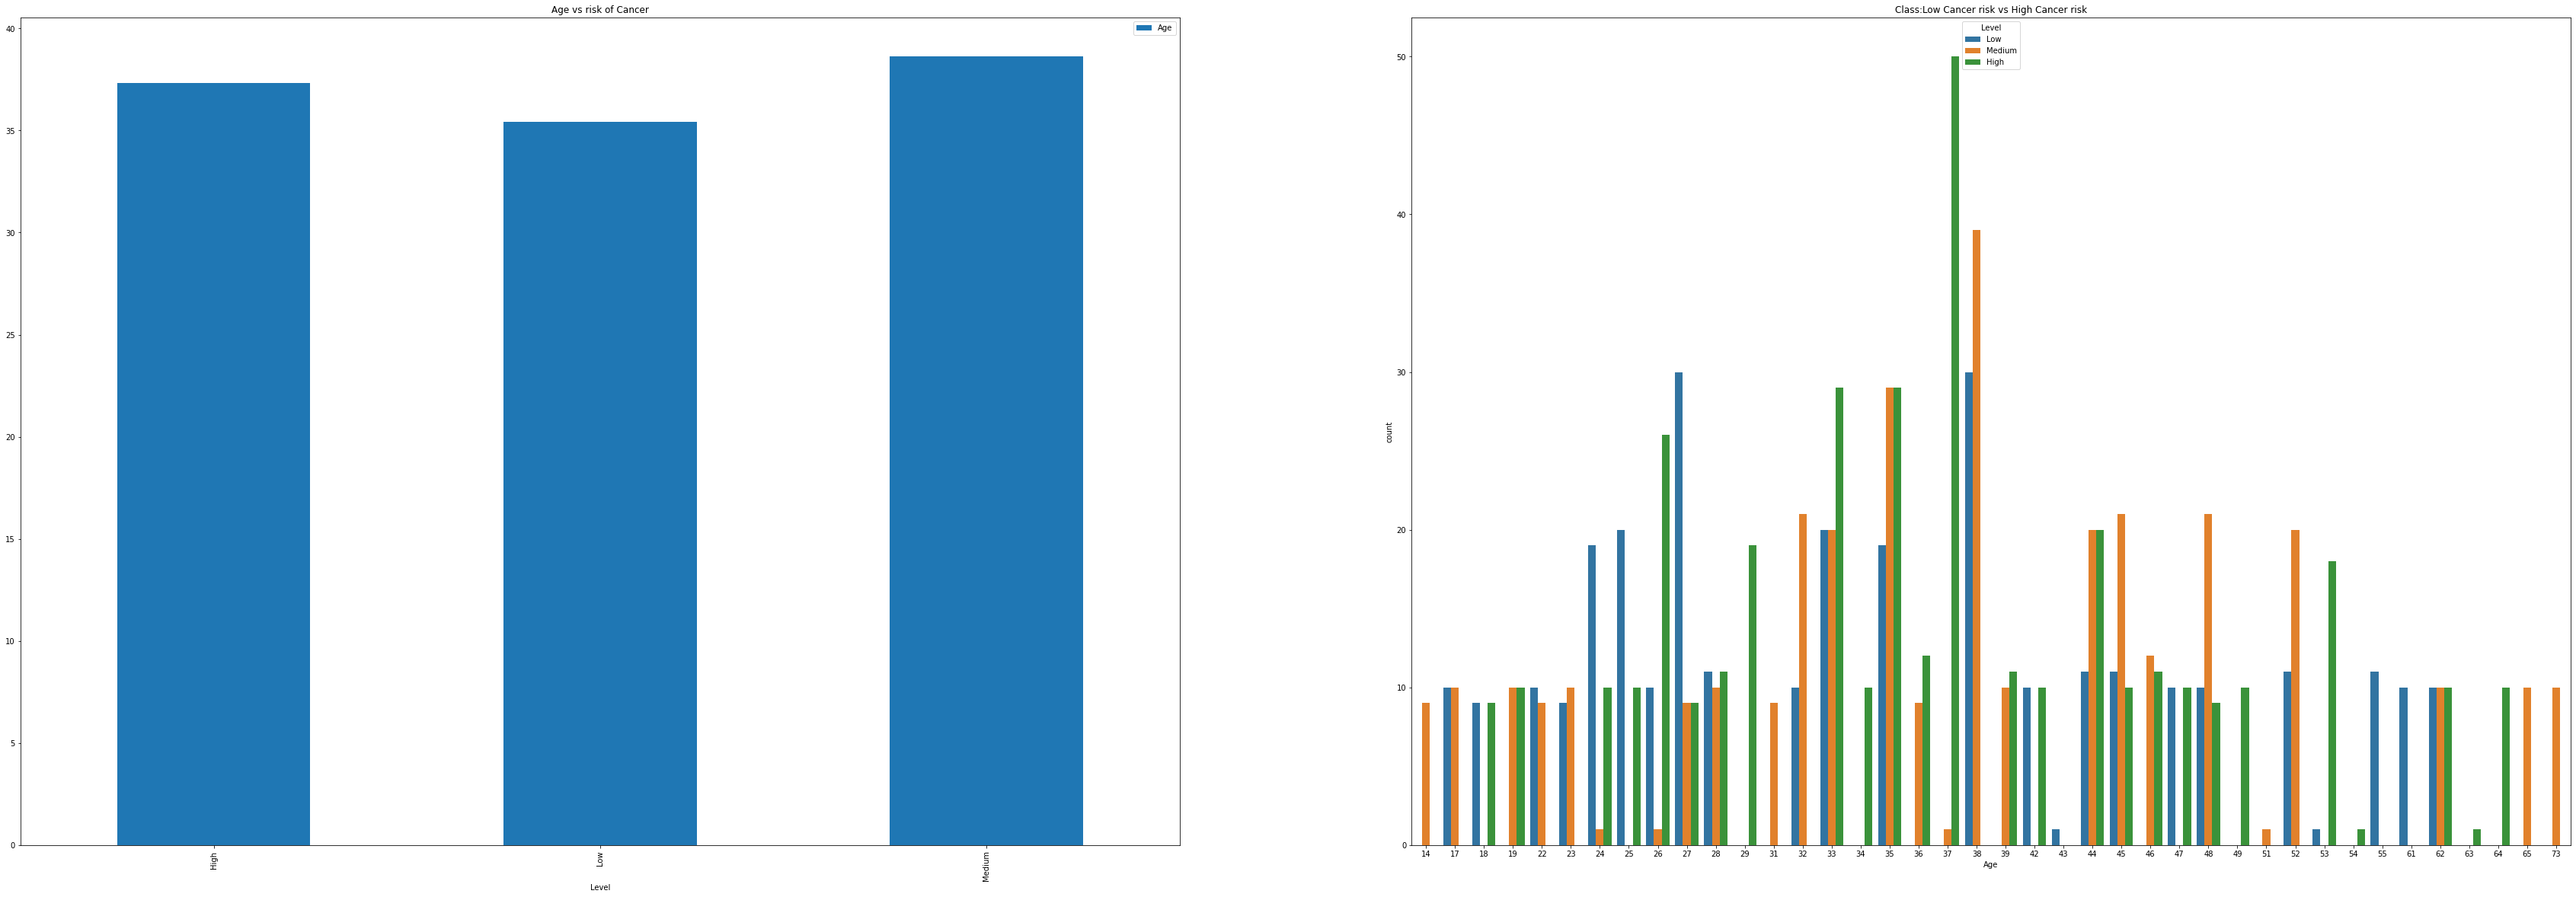

In [7]:
f,ax=plt.subplots(1,2,figsize=(60,20))
df[['Age','Level']].groupby(['Level']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Age vs risk of Cancer')
sns.countplot('Age',hue='Level',data=df,ax=ax[1])
ax[1].set_title('Class:Low Cancer risk vs High Cancer risk')
plt.show()


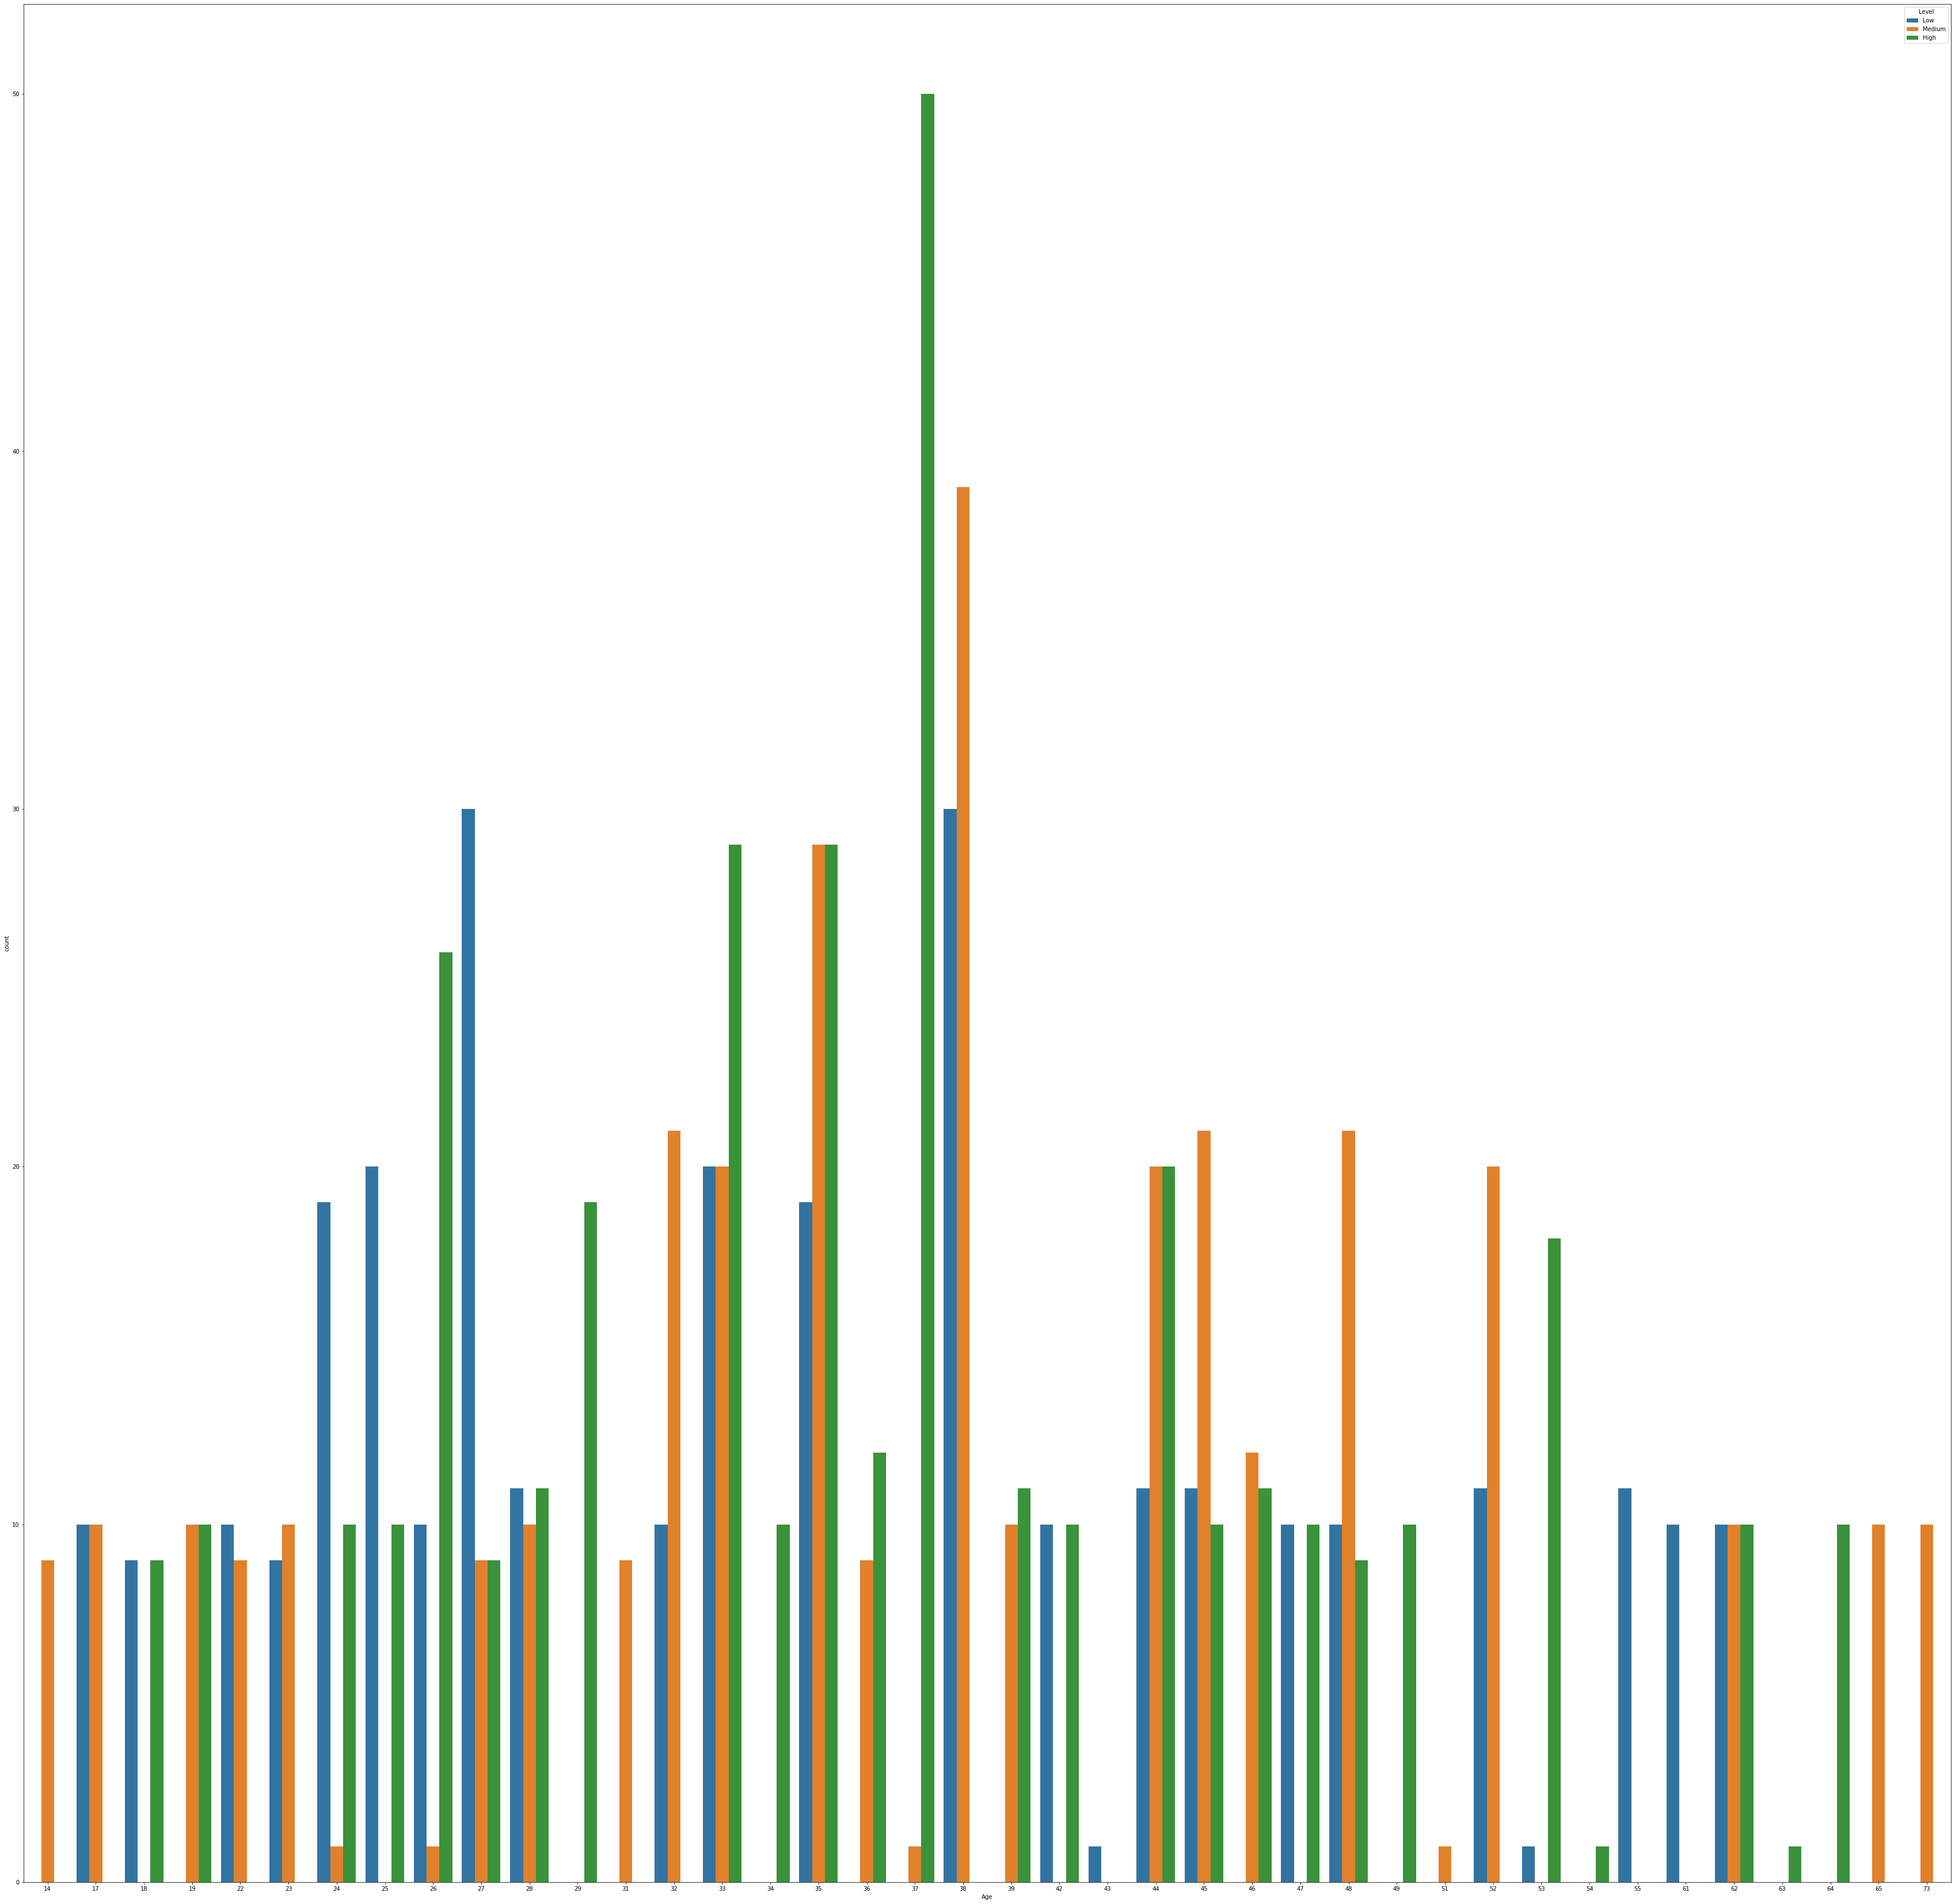

In [8]:
fig_dims = (60, 60)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Age',hue='Level',data=df)
plt.show()


In [9]:
df['Age_band'] = pd.qcut(df['Age'], 5, labels = False)

In [10]:
df.groupby(['Level', 'Age_band'])['Age_band'].count()

Level   Age_band
High    0            65
        1            68
        2           101
        3            72
        4            59
Low     0            87
        1            71
        2            49
        3            43
        4            53
Medium  0            50
        1            69
        2            78
        3            63
        4            72
Name: Age_band, dtype: int64

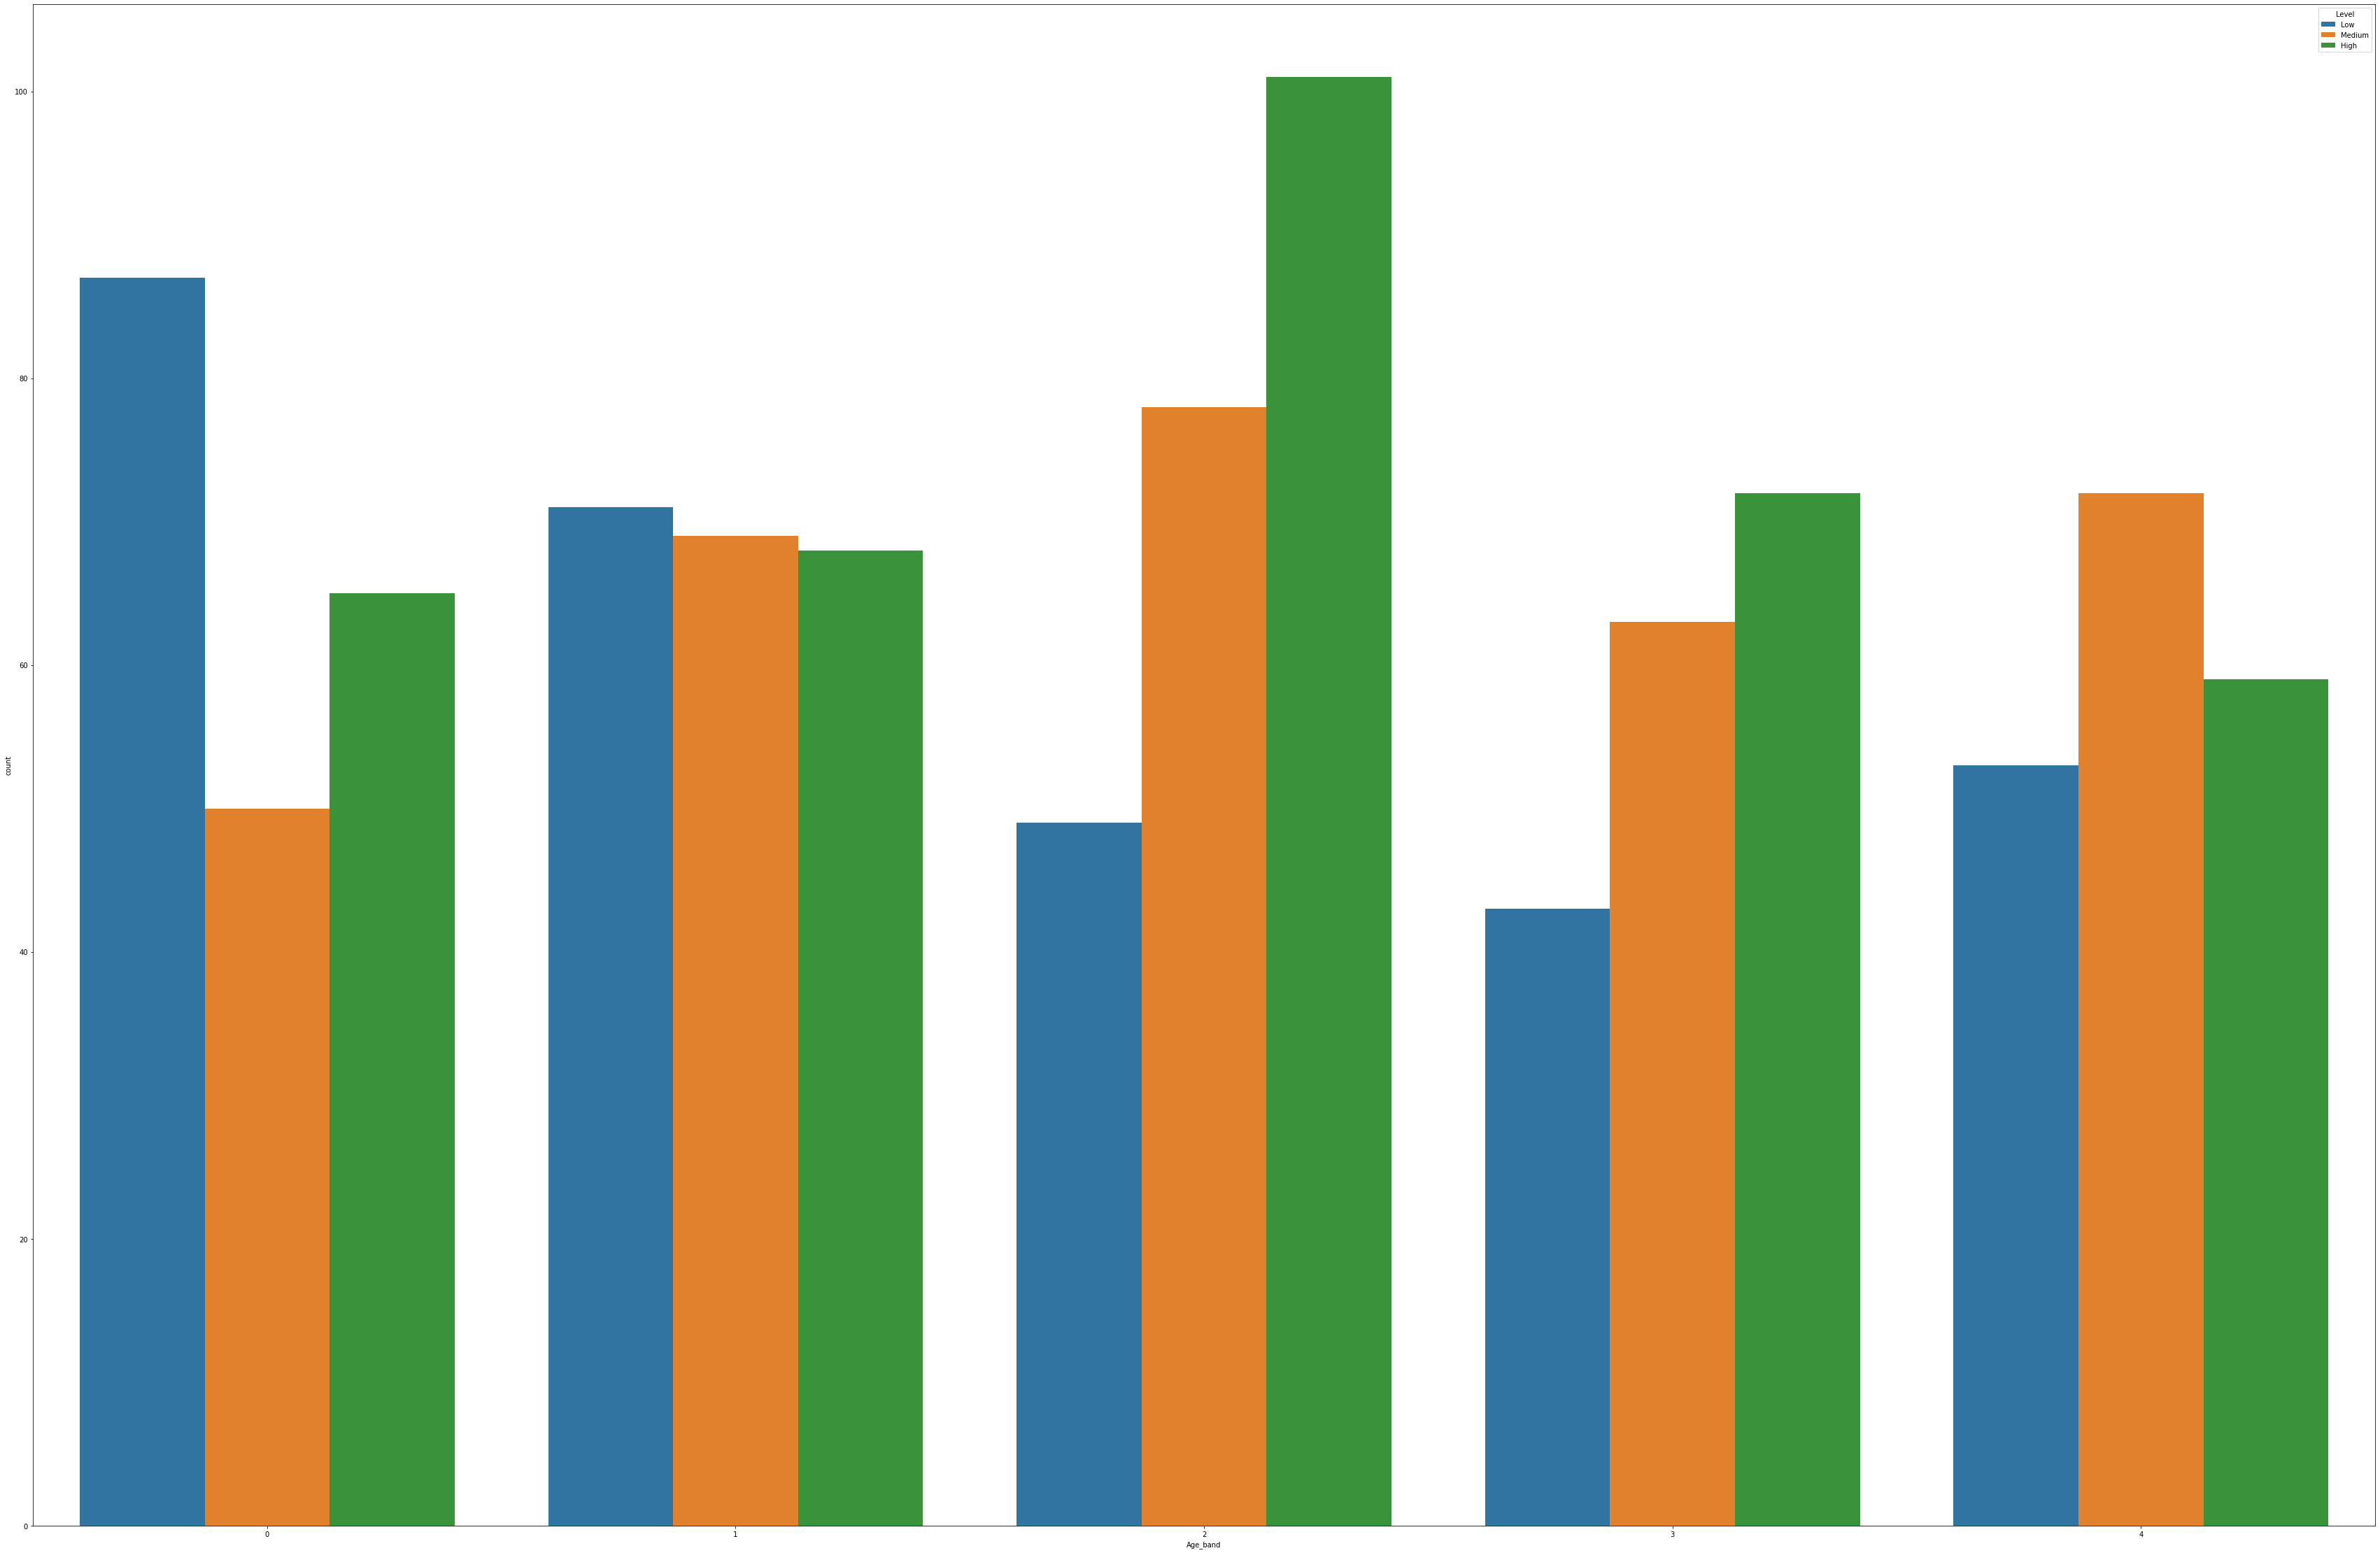

In [11]:
fig_dims = (60, 40)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Age_band',hue='Level',data=df)
plt.show()


# EXPLORATORY DATA ANALYSIS AND CLEANING OF GENDER FEATURE

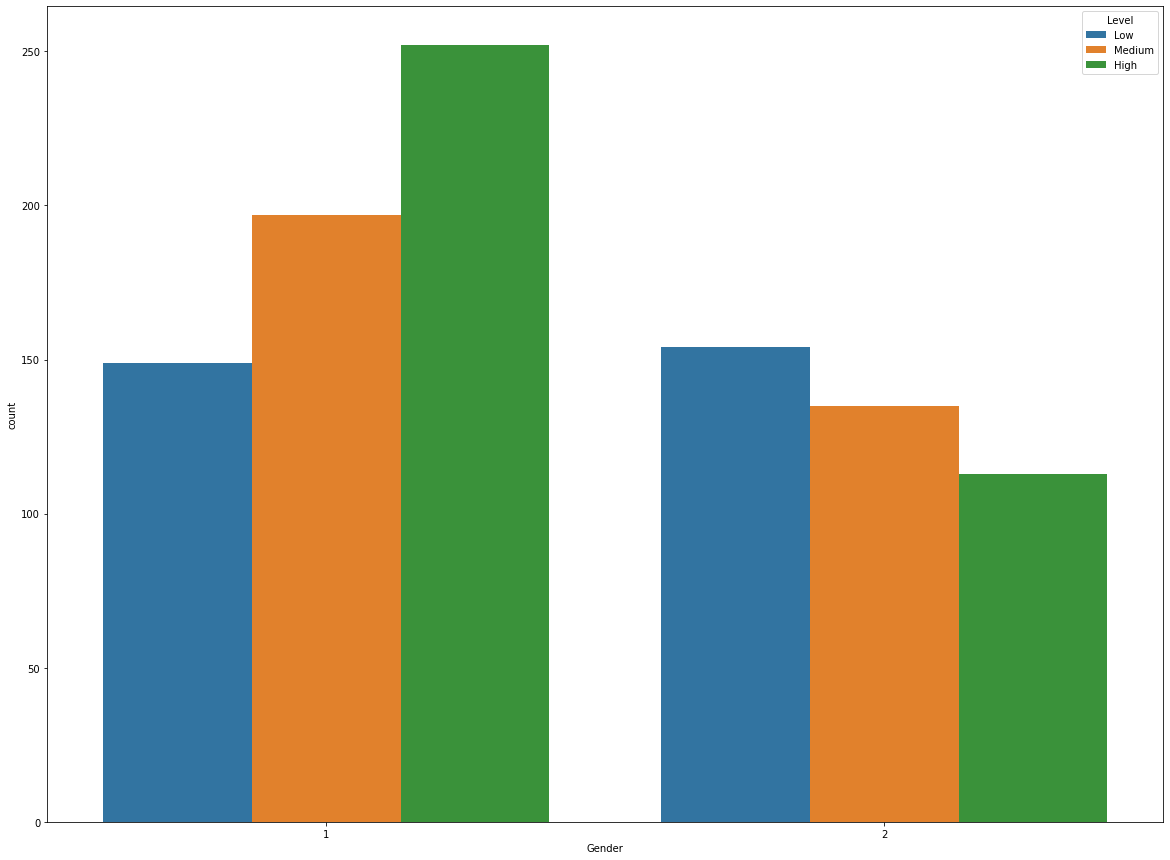

In [12]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Gender',hue='Level',data=df)
plt.show()

In [13]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
df['Gender_encoded'] = label_binarizer.fit_transform(df['Gender'])

In [14]:
df.groupby(['Level','Gender_encoded'])['Gender_encoded'].count()

Level   Gender_encoded
High    0                 252
        1                 113
Low     0                 149
        1                 154
Medium  0                 197
        1                 135
Name: Gender_encoded, dtype: int64

# EXPLORATORY DATA ANALYSIS AND CLEANING OF AIR POLUTION FEATURE

In [15]:
minAirPollutionCount = df['Air Pollution'].min()
maxAirPollutionCount = df['Air Pollution'].max()
print(f'Minimum air pollution count is {minAirPollutionCount} and maximum air pollution count is {maxAirPollutionCount}')


Minimum air pollution count is 1 and maximum air pollution count is 8


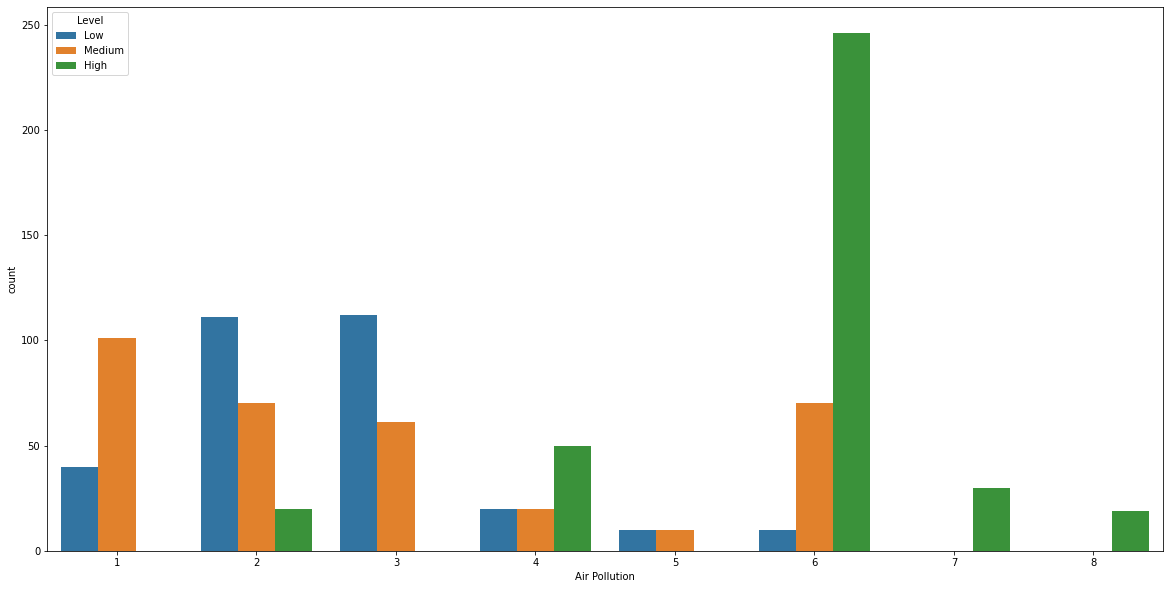

In [16]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Air Pollution',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF ALCOHOL USE FEATURE

In [17]:
minAlcoholUseCount = df['Alcohol use'].min()
maxAlcoholUseCount = df['Alcohol use'].max()
print(f'Minimum Alcohol use pollution count is {minAlcoholUseCount} and maximum Alcohol pollution count is {maxAlcoholUseCount}')



Minimum Alcohol use pollution count is 1 and maximum Alcohol pollution count is 8


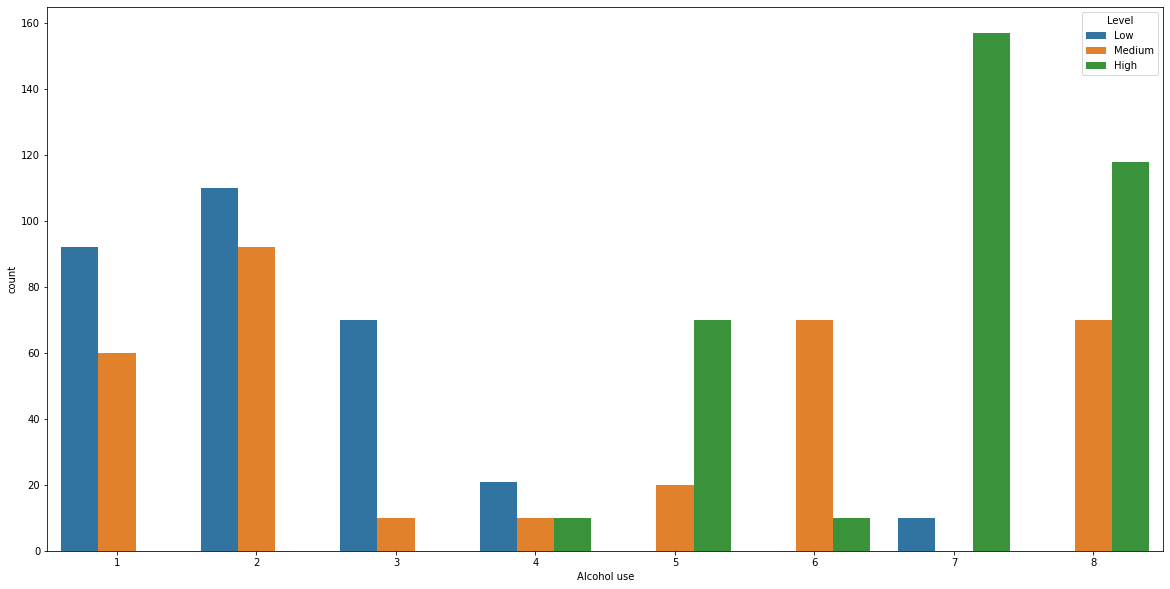

In [18]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Alcohol use',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF DUST ALLERGY FEATURE

In [19]:
minDustAllergyCount = df['Dust Allergy'].min()
maxDustAllergyCount = df['Dust Allergy'].max()
print(f'Minimum Dust Allergy count is {minDustAllergyCount} and maximum Dust Allergy count is {maxDustAllergyCount}')



Minimum Dust Allergy count is 1 and maximum Dust Allergy count is 8


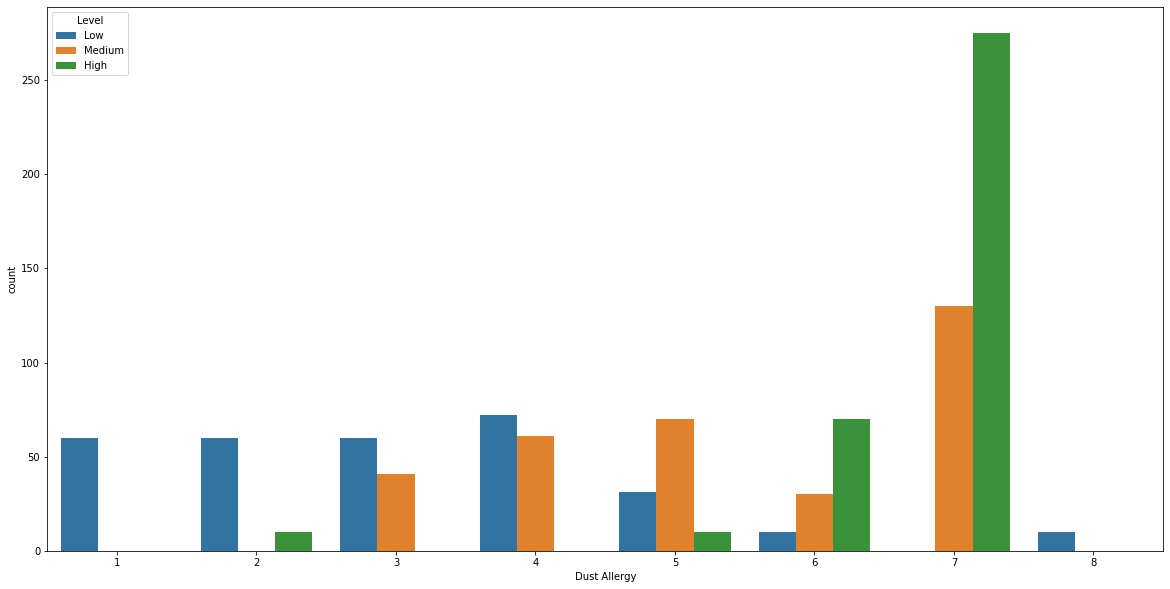

In [20]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Dust Allergy',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF OCCUPATIONAL HAZARD FEATURE

In [21]:
minOccupationalHazardCount = df['OccuPational Hazards'].min()
maxOccupationalHazardCount = df['OccuPational Hazards'].max()
print(f'Minimum OccuPational Hazards count is {minOccupationalHazardCount} and maximum OccuPational Hazards count is {maxOccupationalHazardCount}')



Minimum OccuPational Hazards count is 1 and maximum OccuPational Hazards count is 8


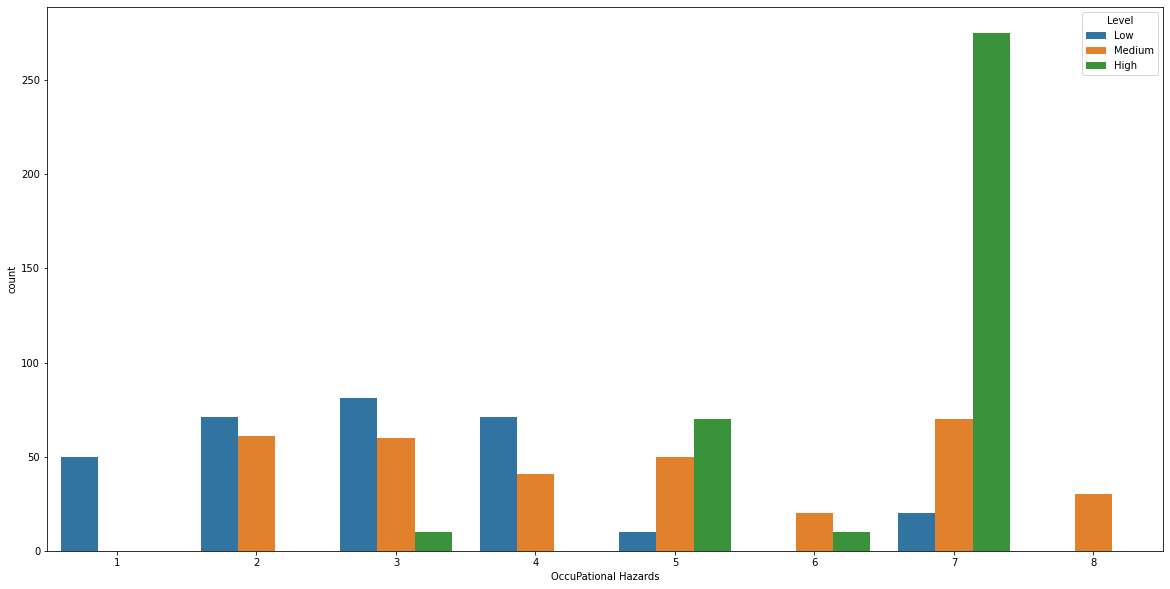

In [22]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('OccuPational Hazards',hue='Level',data=df)
plt.show()

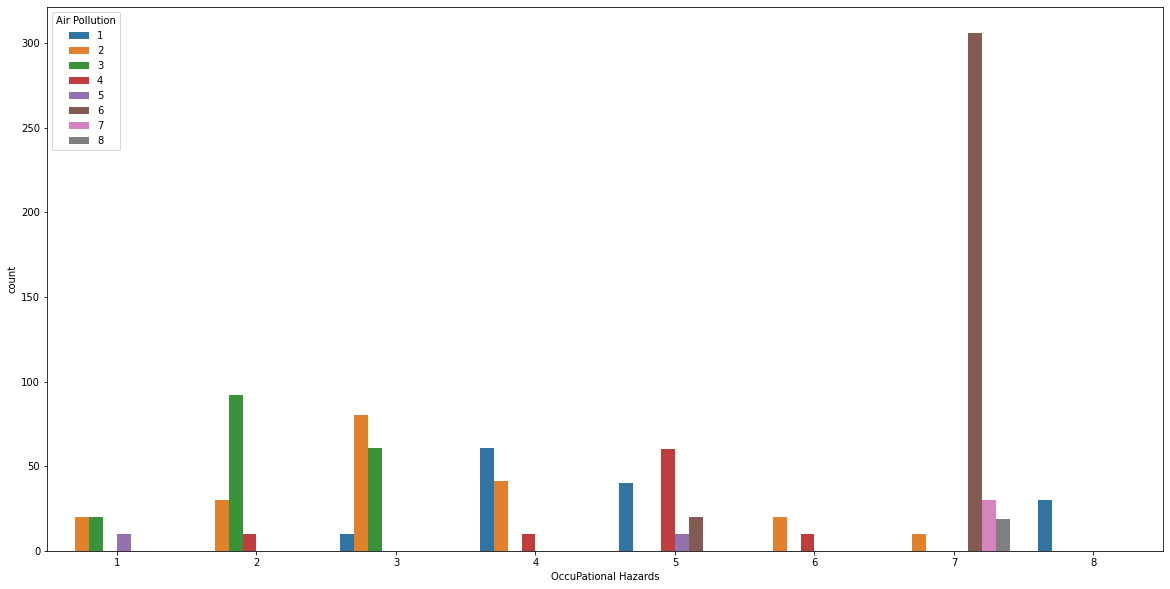

In [23]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('OccuPational Hazards',hue='Air Pollution',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF GENETIC RISK FEATURE

In [24]:
minGeneticRiskCount = df['Genetic Risk'].min()
maxGeneticRiskCount = df['Genetic Risk'].max()
print(f'Minimum Genetic Risk count is {minGeneticRiskCount} and maximum Genetic Risk count is {maxGeneticRiskCount}')





Minimum Genetic Risk count is 1 and maximum Genetic Risk count is 7


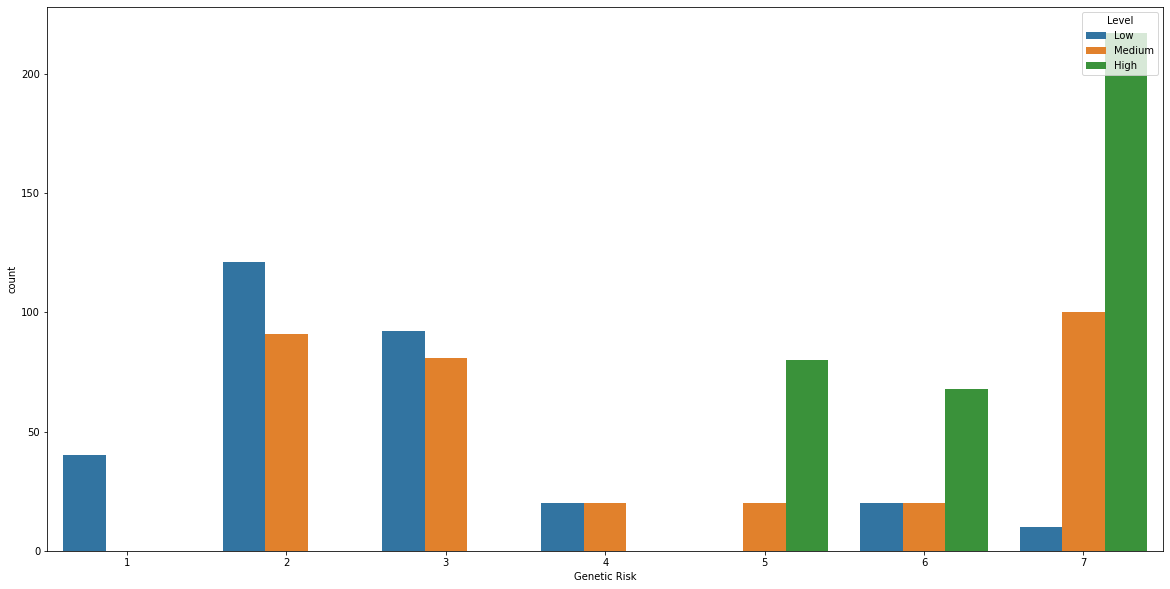

In [25]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Genetic Risk',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF CHRONIC LUNG DISEASE FEATURE

In [26]:
minChronicLungDiseaseCount = df['chronic Lung Disease'].min()
maxChronicLungDiseaseCount = df['chronic Lung Disease'].max()
print(f'Minimum chronic Lung Disease count is {minChronicLungDiseaseCount} and maximum chronic Lung Disease count is {maxChronicLungDiseaseCount}')


Minimum chronic Lung Disease count is 1 and maximum chronic Lung Disease count is 7


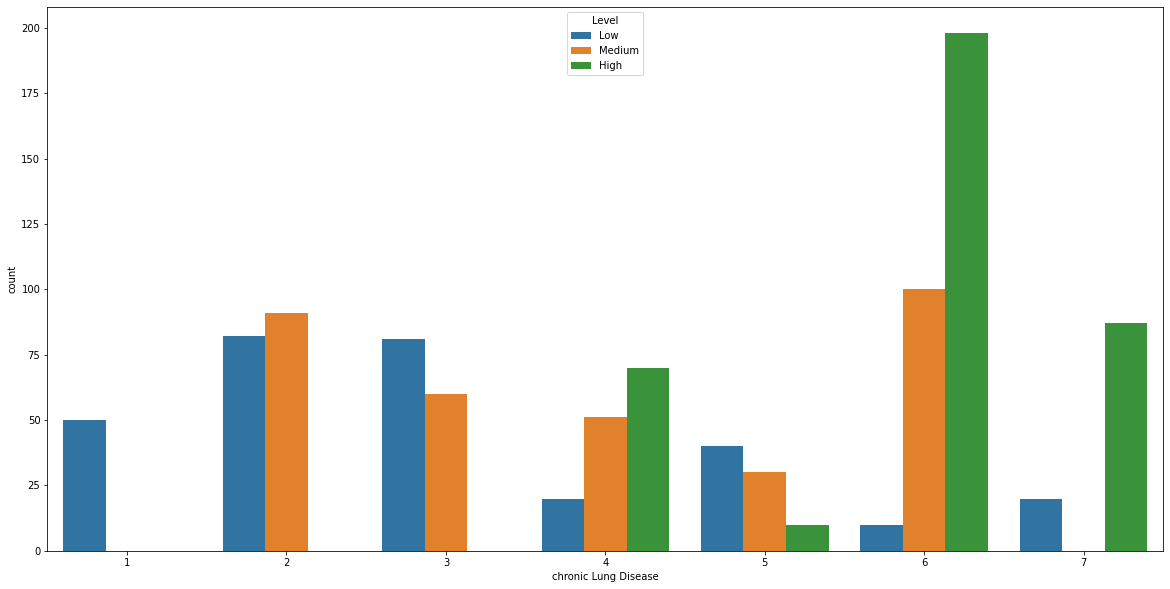

In [27]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('chronic Lung Disease',hue='Level',data=df)
plt.show()

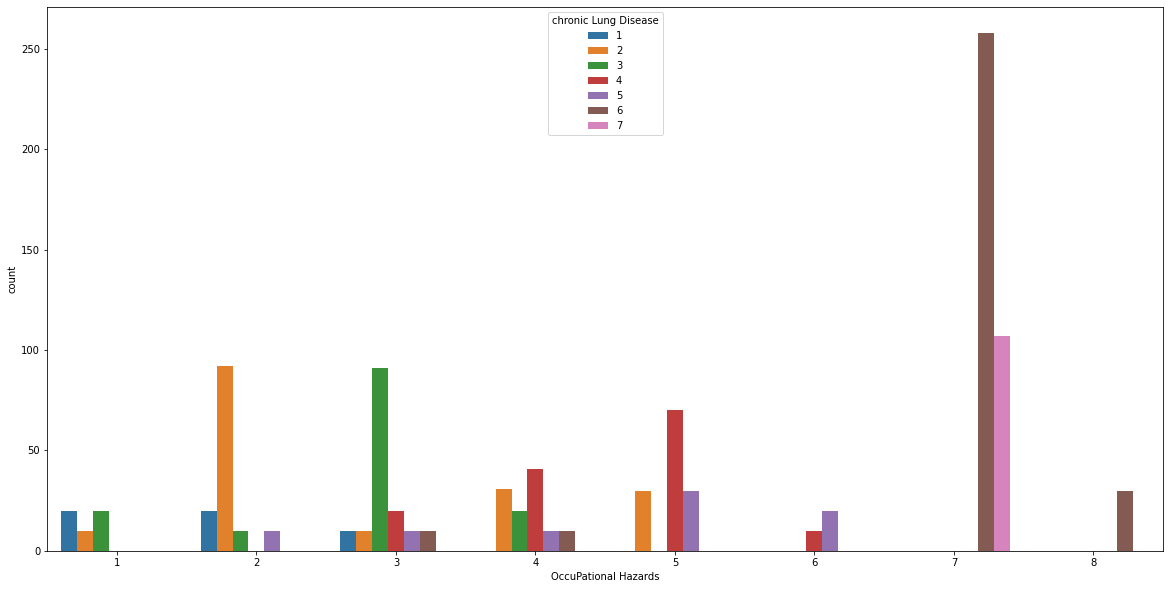

In [28]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('OccuPational Hazards',hue='chronic Lung Disease',data=df)
plt.show()

In [29]:
df.groupby(['Level','chronic Lung Disease', 'OccuPational Hazards', 'Air Pollution'])['chronic Lung Disease'].count()

Level   chronic Lung Disease  OccuPational Hazards  Air Pollution
High    4                     5                     4                 50
                                                    6                 20
        5                     6                     2                 10
        6                     3                     2                 10
                              7                     6                159
                                                    7                 10
                                                    8                 19
        7                     7                     6                 67
                                                    7                 20
Low     1                     1                     2                 10
                                                    3                 10
                              2                     2                 20
                              3                     3     

# EXPLORATORY DATA ANALYSIS AND CLEANING OF BALANCED DIET FEATURE

In [30]:
minBalancedDietCount = df['Balanced Diet'].min()
maxBalancedDietCount = df['Balanced Diet'].max()
print(f'Minimum Balanced Diet count is {minBalancedDietCount} and maximum Balanced Diet count is {maxBalancedDietCount}')


Minimum Balanced Diet count is 1 and maximum Balanced Diet count is 7


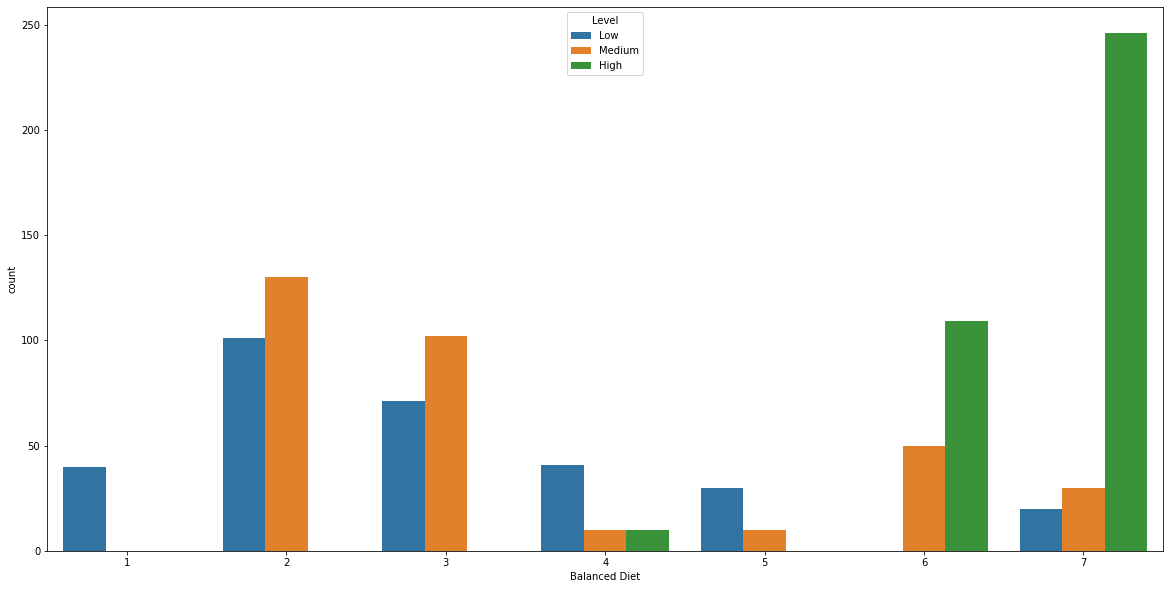

In [31]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Balanced Diet',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF OBESITY FEATURE

In [32]:
minObesityCount = df['Obesity'].min()
maxObesityCount = df['Obesity'].max()
print(f'Minimum Obesity count is {minBalancedDietCount} and maximum Obesity count is {maxBalancedDietCount}')


Minimum Obesity count is 1 and maximum Obesity count is 7


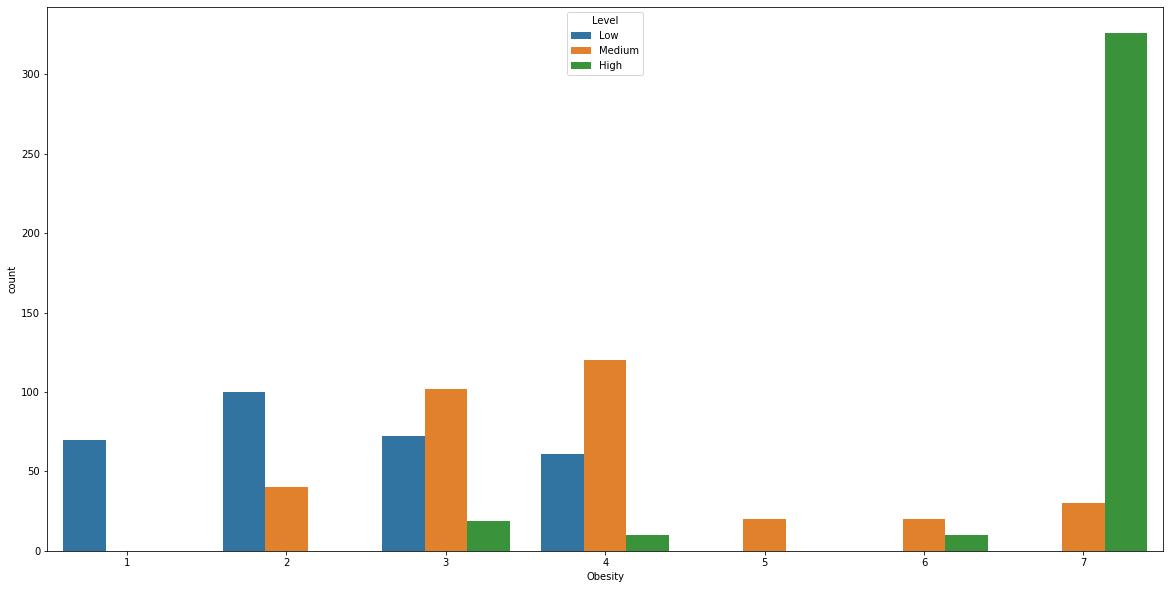

In [33]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Obesity',hue='Level',data=df)
plt.show()



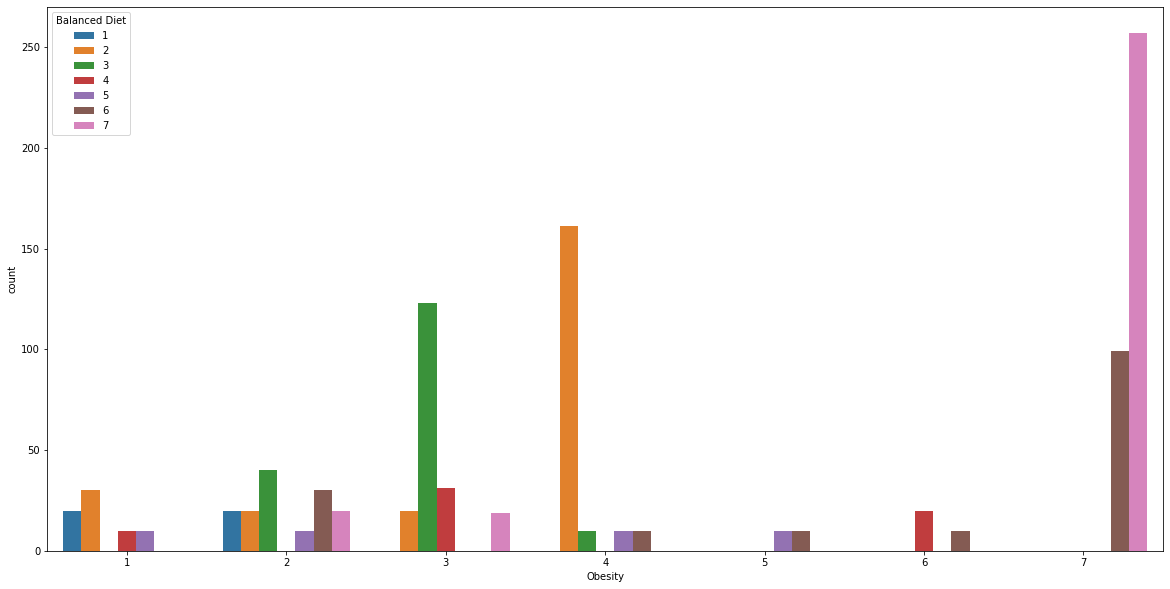

In [34]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Obesity',hue='Balanced Diet',data=df)
plt.show()


In [35]:
df.groupby(['Level','Obesity', 'Balanced Diet'])['Obesity'].count()

Level   Obesity  Balanced Diet
High    3        7                 19
        4        6                 10
        6        4                 10
        7        6                 99
                 7                227
Low     1        1                 20
                 2                 30
                 4                 10
                 5                 10
        2        1                 20
                 2                 10
                 3                 40
                 5                 10
                 7                 20
        3        2                 20
                 3                 21
                 4                 31
        4        2                 41
                 3                 10
                 5                 10
Medium  2        2                 10
                 6                 30
        3        3                102
        4        2                120
        5        5                 10
                 6 

# EXPLORATORY DATA ANALYSIS AND CLEANING OF SMOKING FEATURE

In [36]:
minSmokingCount = df['Smoking'].min()
maxSmokingCount = df['Smoking'].max()
print(f'Minimum Smoking count is {minSmokingCount} and maximum Smoking count is {maxSmokingCount}')


Minimum Smoking count is 1 and maximum Smoking count is 8


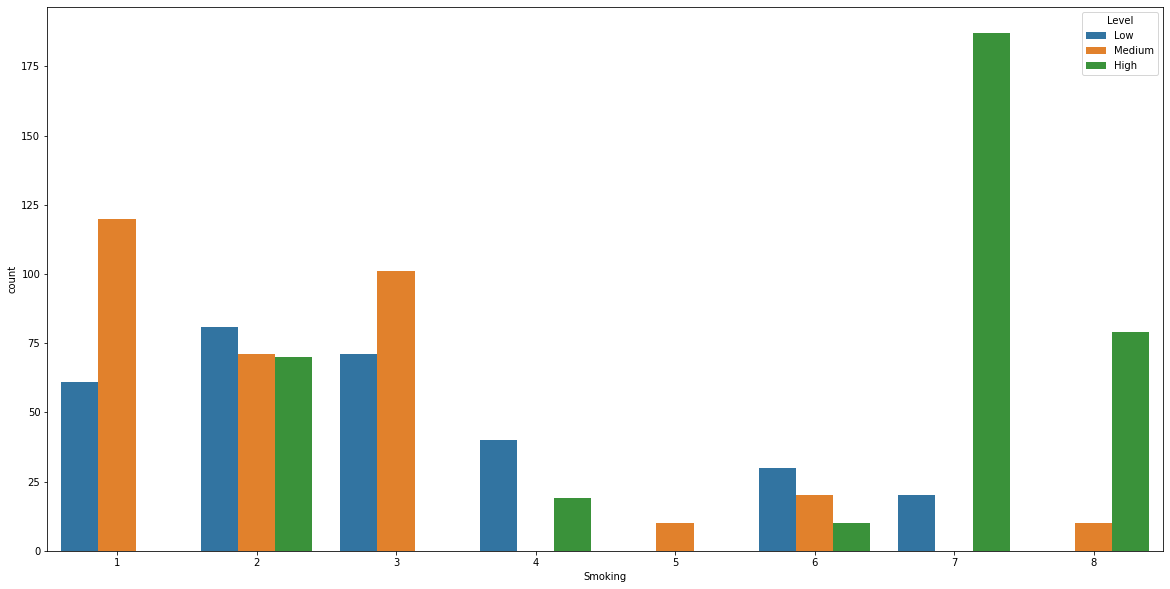

In [37]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Smoking',hue='Level',data=df)
plt.show()


# EXPLORATORY DATA ANALYSIS AND CLEANING OF PASSIVE SMOKER FEATURE

In [38]:
minPassiveSmokerCount = df['Passive Smoker'].min()
maxPassiveSmokerCount = df['Passive Smoker'].max()
print(f'Minimum Passive Smoker count is {minPassiveSmokerCount} and maximum Passive Smoker count is {maxPassiveSmokerCount}')


Minimum Passive Smoker count is 1 and maximum Passive Smoker count is 8


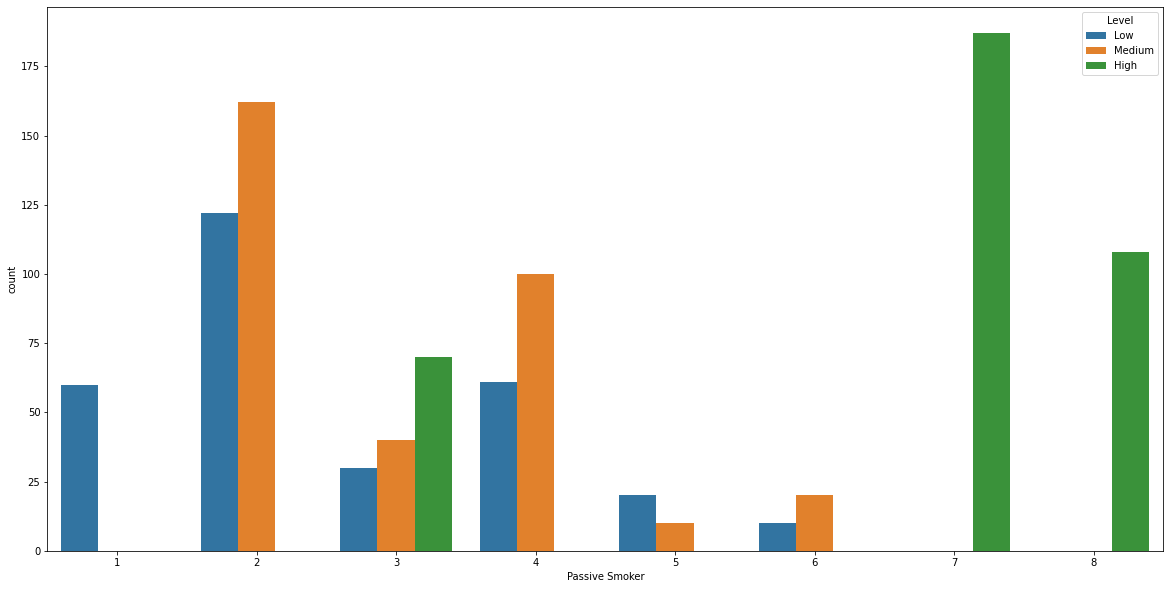

In [39]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Passive Smoker',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF CHEST PAIN FEATURE

In [40]:
minChestPainCount = df['Chest Pain'].min()
maxChestPainCount = df['Chest Pain'].max()
print(f'Minimum Chest Pain count is {minChestPainCount} and maximum Chest Pain count is {maxChestPainCount}')


Minimum Chest Pain count is 1 and maximum Chest Pain count is 9


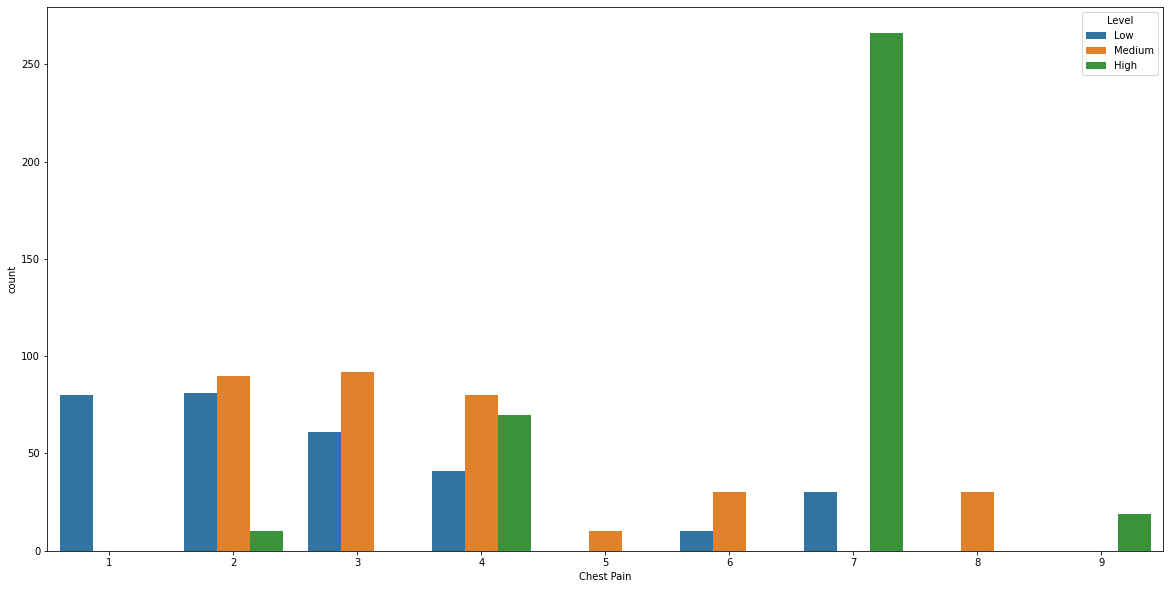

In [41]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Chest Pain',hue='Level',data=df)
plt.show()

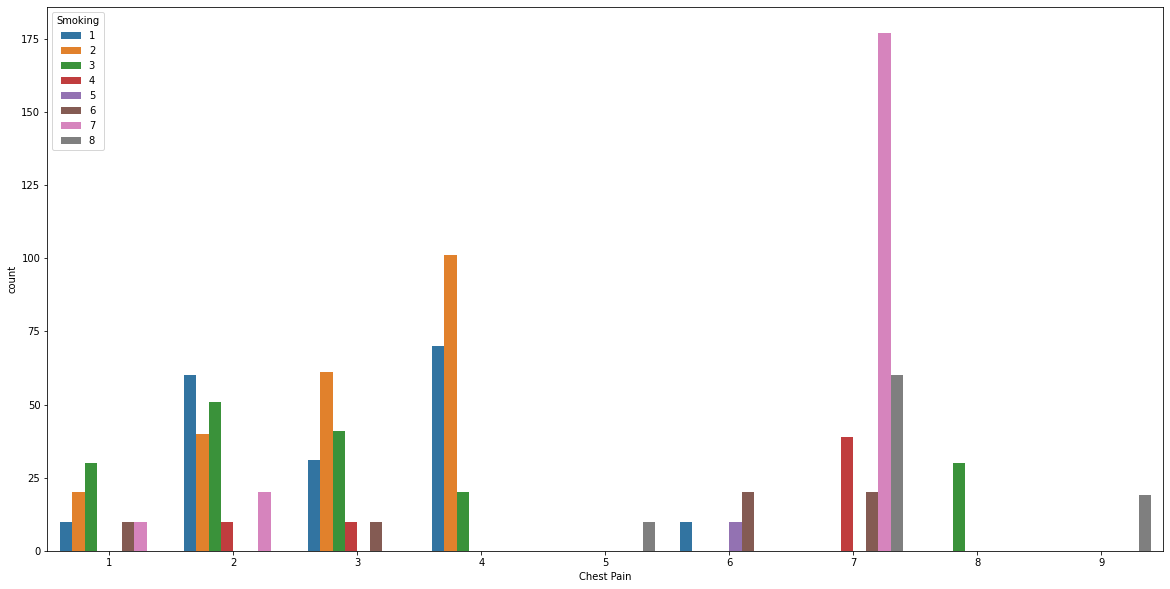

In [42]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Chest Pain',hue='Smoking',data=df)
plt.show()

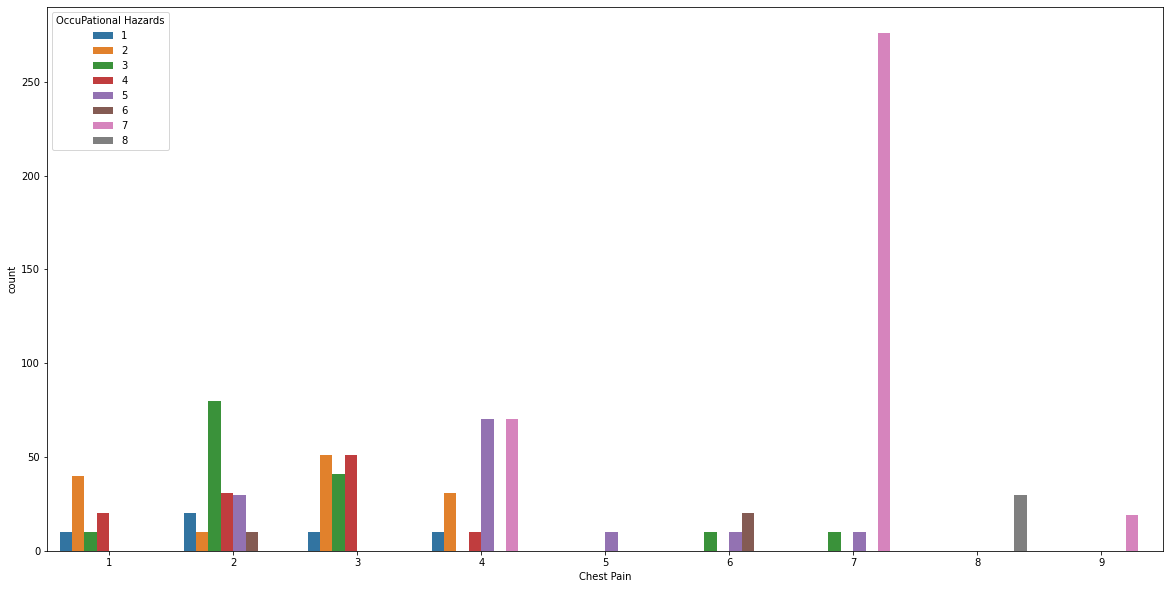

In [43]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Chest Pain',hue='OccuPational Hazards',data=df)
plt.show()


In [44]:
df.groupby(['Level','Chest Pain', 'Smoking'])['Chest Pain'].count()

Level   Chest Pain  Smoking
High    2           7           10
        4           2           70
        7           4           19
                    6           10
                    7          177
                    8           60
        9           8           19
Low     1           1           10
                    2           20
                    3           30
                    6           10
                    7           10
        2           1           10
                    2           30
                    3           21
                    4           10
                    7           10
        3           1           31
                    2           10
                    4           10
                    6           10
        4           2           21
                    3           20
        6           1           10
        7           4           20
                    6           10
Medium  2           1           50
                    2      

In [45]:
df.groupby(['Level','Chest Pain', 'OccuPational Hazards'])['Chest Pain'].count()

Level   Chest Pain  OccuPational Hazards
High    2           6                        10
        4           5                        70
        7           3                        10
                    7                       256
        9           7                        19
Low     1           1                        10
                    2                        40
                    3                        10
                    4                        20
        2           1                        20
                    2                        10
                    3                        20
                    4                        31
        3           1                        10
                    3                        41
                    4                        10
        4           1                        10
                    2                        21
                    4                        10
        6           3                        10

# EXPLORATORY DATA ANALYSIS AND CLEANING OF COUGHING OF BLOOD FEATURE

In [46]:
minChestPainCount = df['Coughing of Blood'].min()
maxChestPainCount = df['Coughing of Blood'].max()
print(f'Minimum Coughing of Blood count is {minChestPainCount} and maximum Coughing of Blood count is {maxChestPainCount}')


Minimum Coughing of Blood count is 1 and maximum Coughing of Blood count is 9


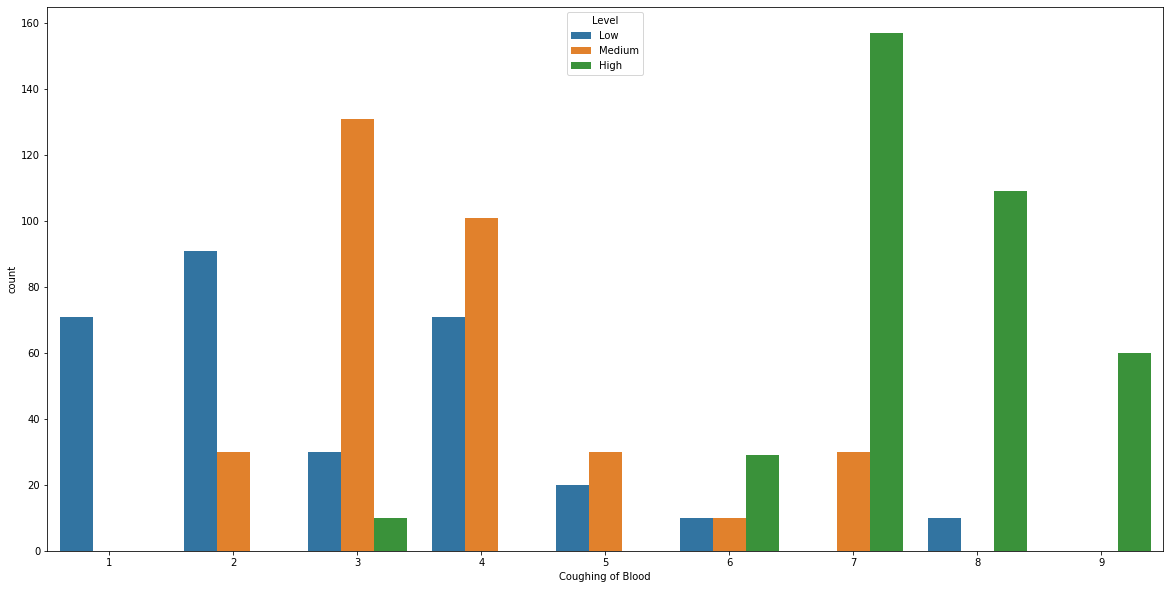

In [47]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Coughing of Blood',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF FATIGUE FEATURE

In [48]:
minCoughingofBloodCount = df['Coughing of Blood'].min()
maxCoughingofBloodCount = df['Coughing of Blood'].max()
print(f'Minimum Coughing of Blood count is {minCoughingofBloodCount} and maximum Coughing of Blood count is {maxCoughingofBloodCount}')


Minimum Coughing of Blood count is 1 and maximum Coughing of Blood count is 9


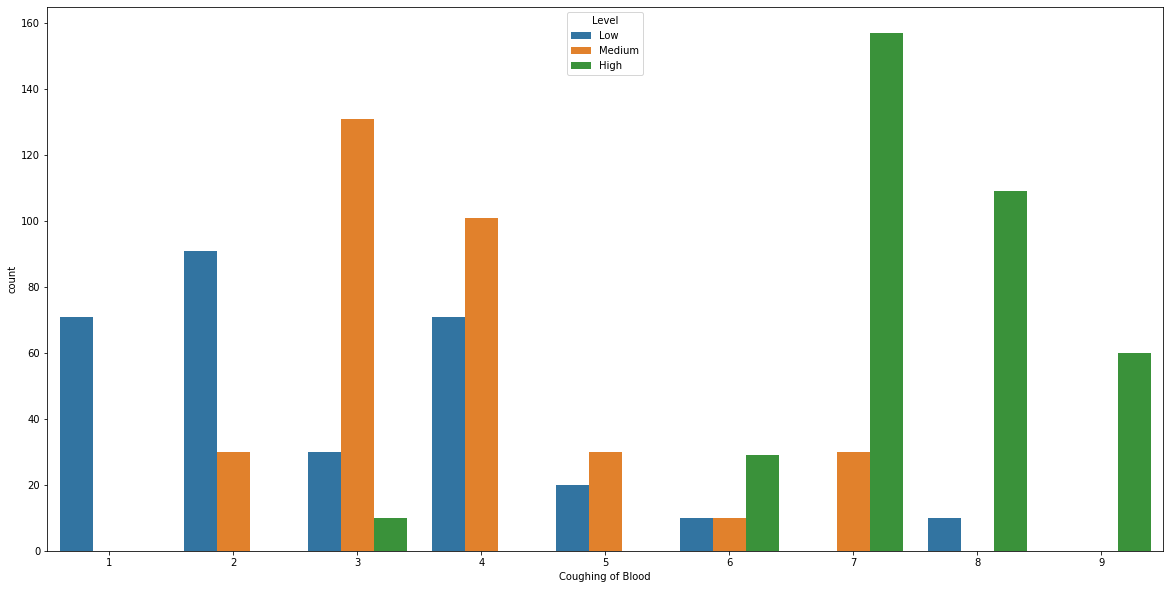

In [49]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Coughing of Blood',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF WEIGHT LOSS FEATURE

In [50]:
minWeightLossCount = df['Weight Loss'].min()
maxWeightLossCount = df['Weight Loss'].max()
print(f'Minimum Weight Loss count is {minWeightLossCount} and maximum Weight Loss count is {maxWeightLossCount}')


Minimum Weight Loss count is 1 and maximum Weight Loss count is 8


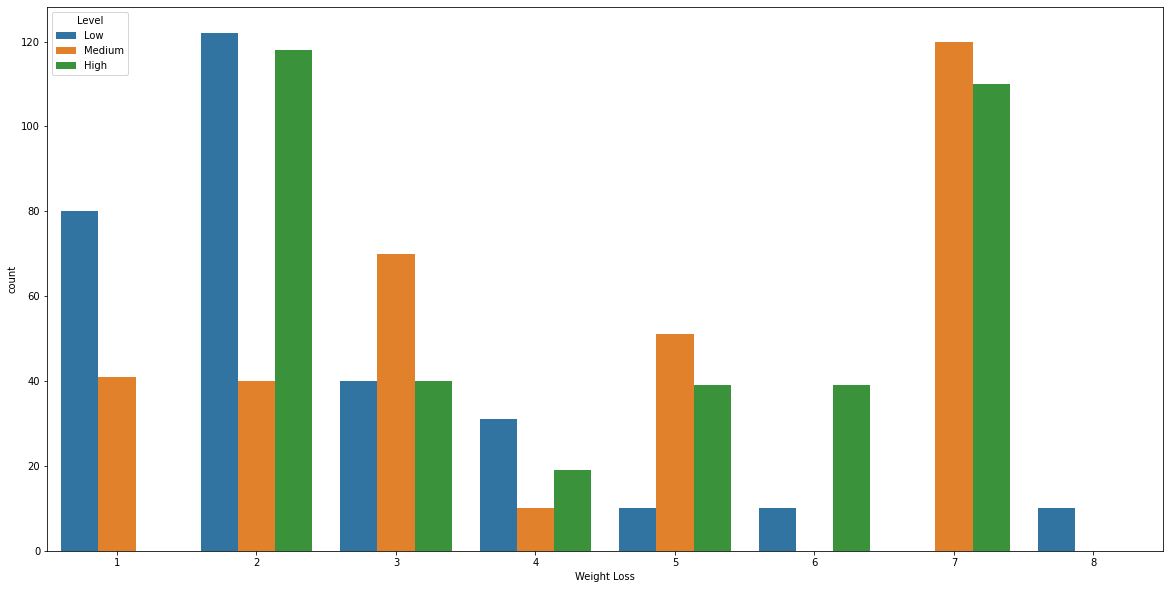

In [51]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Weight Loss',hue='Level',data=df)
plt.show()

In [52]:
df.groupby(['Level', 'Weight Loss'])['Level'].count()

Level   Weight Loss
High    2              118
        3               40
        4               19
        5               39
        6               39
        7              110
Low     1               80
        2              122
        3               40
        4               31
        5               10
        6               10
        8               10
Medium  1               41
        2               40
        3               70
        4               10
        5               51
        7              120
Name: Level, dtype: int64

# EXPLORATORY DATA ANALYSIS AND CLEANING OF SHORTNESS OF BREATH FEATURE

In [53]:
minShortnessOfBreathCount = df['Shortness of Breath'].min()
maxShortnessOfBreathCount = df['Shortness of Breath'].max()
print(f'Minimum Shortness of Breath count is {minShortnessOfBreathCount} and maximum Shortness of Breath count is {maxShortnessOfBreathCount}')


Minimum Shortness of Breath count is 1 and maximum Shortness of Breath count is 9


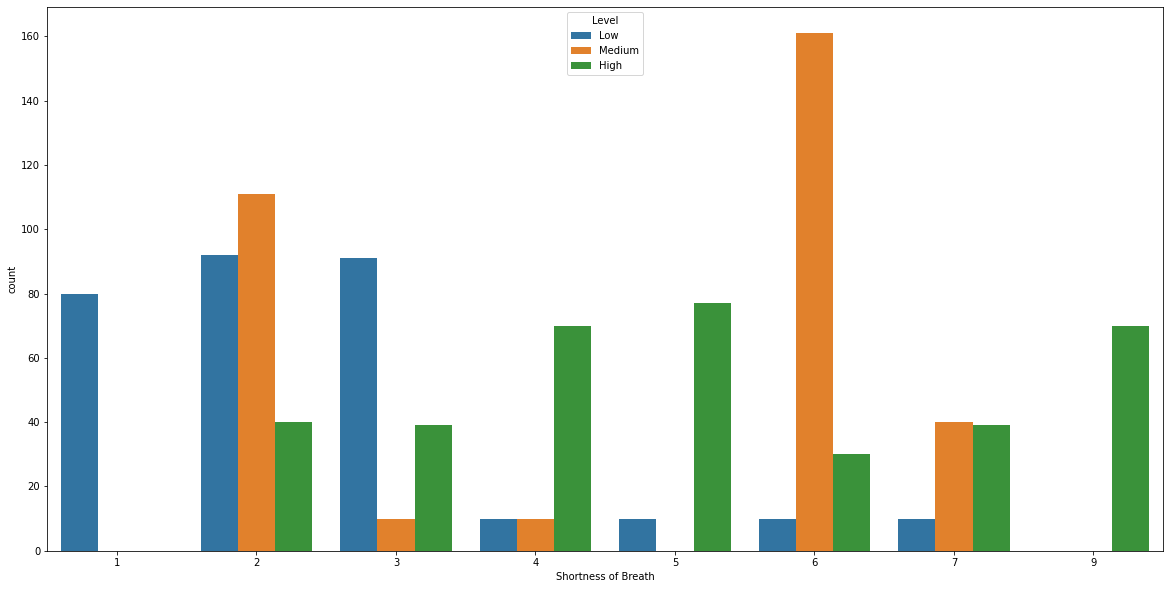

In [54]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Shortness of Breath',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF WHEEZING FEATURE

In [55]:
minWheezingCount = df['Wheezing'].min()
maxWheezingCount = df['Wheezing'].max()
print(f'Minimum Wheezing count is {minWheezingCount} and maximum Wheezing count is {maxWheezingCount}')


Minimum Wheezing count is 1 and maximum Wheezing count is 8


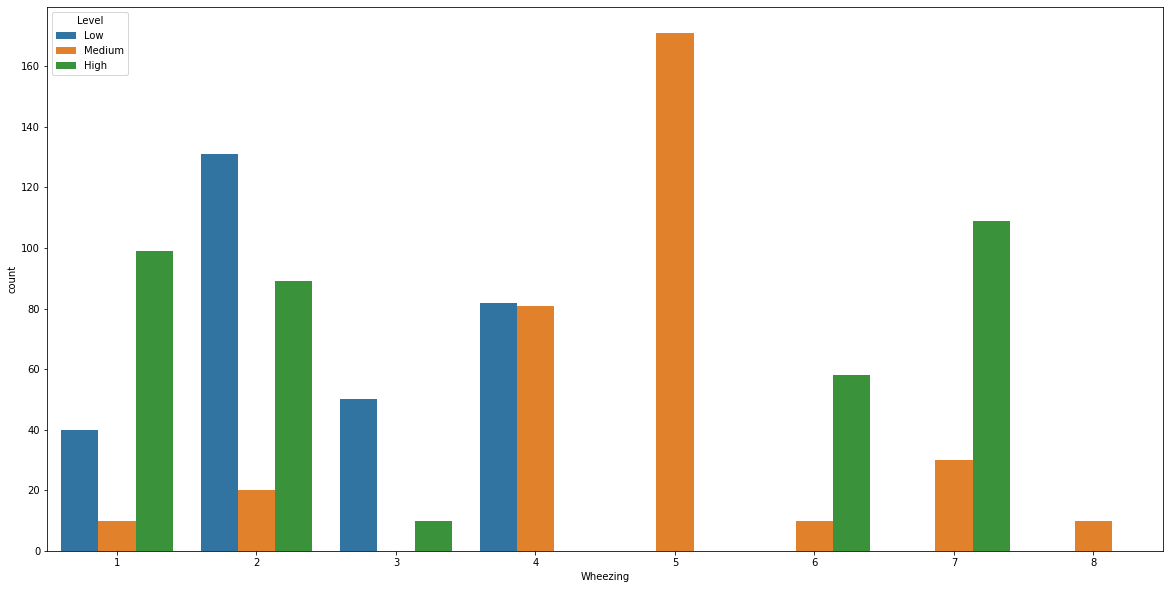

In [56]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Wheezing',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF SWALLOWING DIFFICULTY FEATURE

In [57]:
minSwallowingDifficultyCount = df['Swallowing Difficulty'].min()
maxSwallowingDifficultyCount = df['Swallowing Difficulty'].max()
print(f'Minimum Swallowing Difficulty count is {minSwallowingDifficultyCount} and maximum Swallowing Difficulty count is {maxSwallowingDifficultyCount}')


Minimum Swallowing Difficulty count is 1 and maximum Swallowing Difficulty count is 8


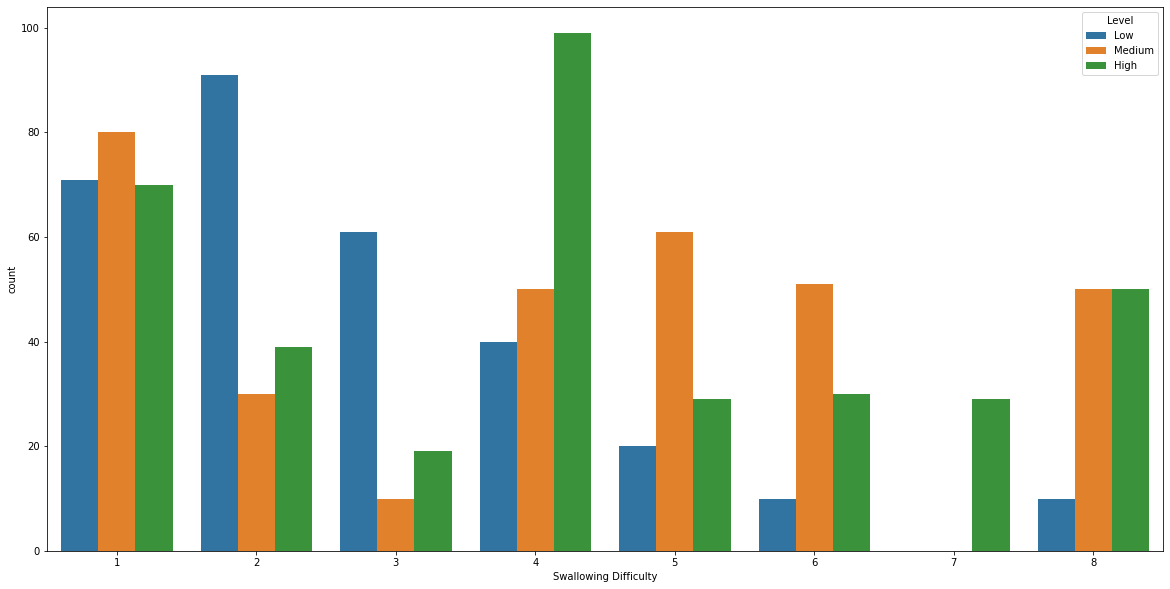

In [58]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Swallowing Difficulty',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF CLUBBING OF FINGER NAILS FEATURE

In [59]:
minClubbingOfFingerNailsCount = df['Clubbing of Finger Nails'].min()
maxClubbingOfFingerNailsCount = df['Clubbing of Finger Nails'].max()
print(f'Minimum Clubbing of Finger Nails count is {minClubbingOfFingerNailsCount} and maximum Clubbing of Finger Nails count is {maxClubbingOfFingerNailsCount}')


Minimum Clubbing of Finger Nails count is 1 and maximum Clubbing of Finger Nails count is 9


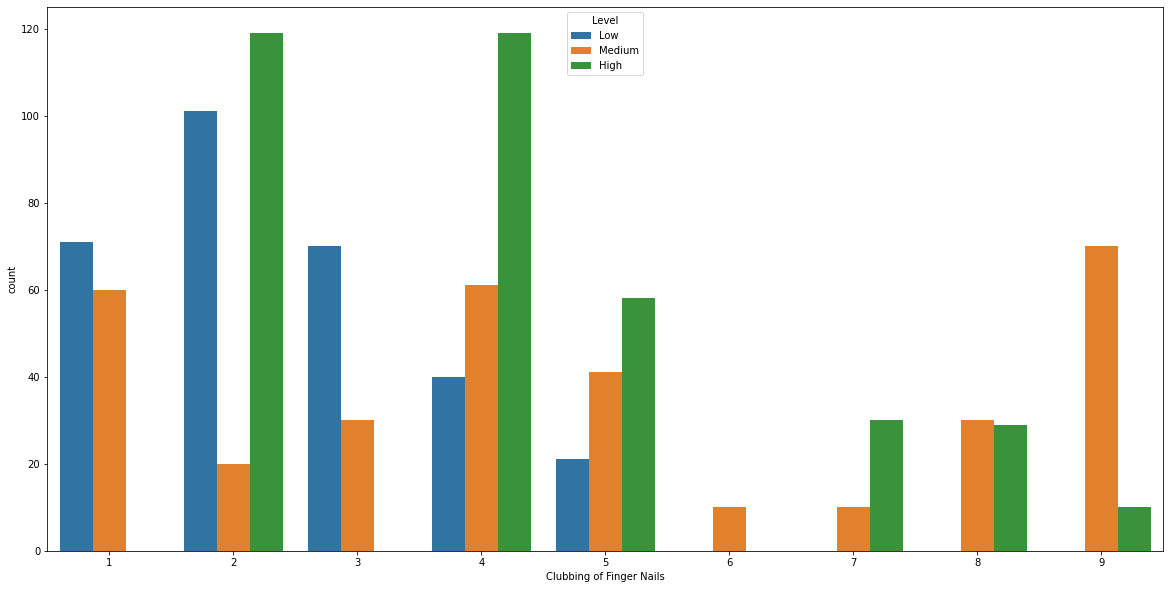

In [60]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Clubbing of Finger Nails',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF FREQUENT COLD FEATURE

In [61]:
minClubbingOfFingerNailsCount = df['Frequent Cold'].min()
maxClubbingOfFingerNailsCount = df['Frequent Cold'].max()
print(f'Minimum Frequent Cold count is {minClubbingOfFingerNailsCount} and maximum Frequent Cold count is {maxClubbingOfFingerNailsCount}')


Minimum Frequent Cold count is 1 and maximum Frequent Cold count is 7


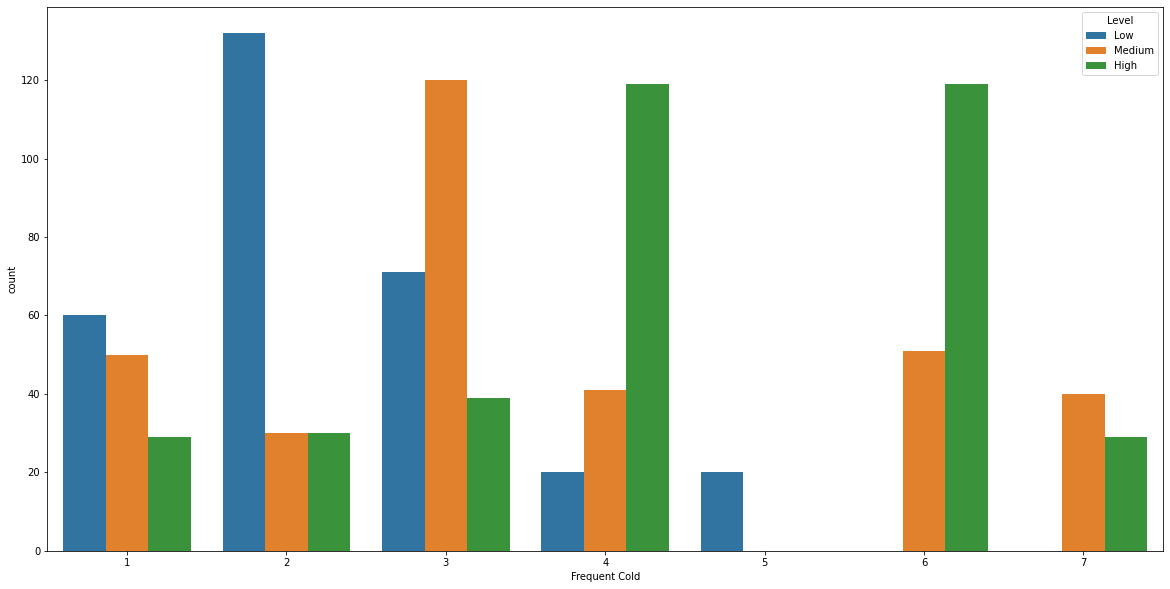

In [62]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Frequent Cold',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF DRY COUGH FEATURE

In [63]:
minDryCoughCount = df['Dry Cough'].min()
maxDryCoughCount = df['Dry Cough'].max()
print(f'Minimum Dry Cough count is {minDryCoughCount} and maximum Dry Cough count is {maxDryCoughCount}')


Minimum Dry Cough count is 1 and maximum Dry Cough count is 7


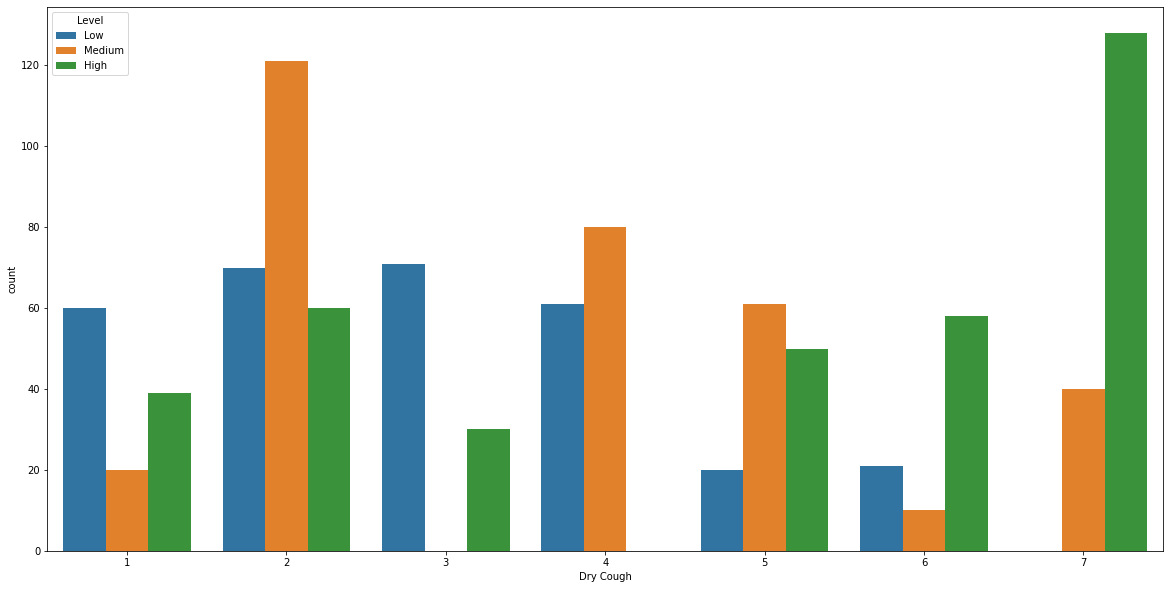

In [64]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Dry Cough',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF SNORRING FEATURE

In [65]:
minSnoringCount = df['Snoring'].min()
maxSnoringCount = df['Snoring'].max()
print(f'Minimum Snoring count is {minSnoringCount} and maximum Snoring count is {maxSnoringCount}')


Minimum Snoring count is 1 and maximum Snoring count is 7


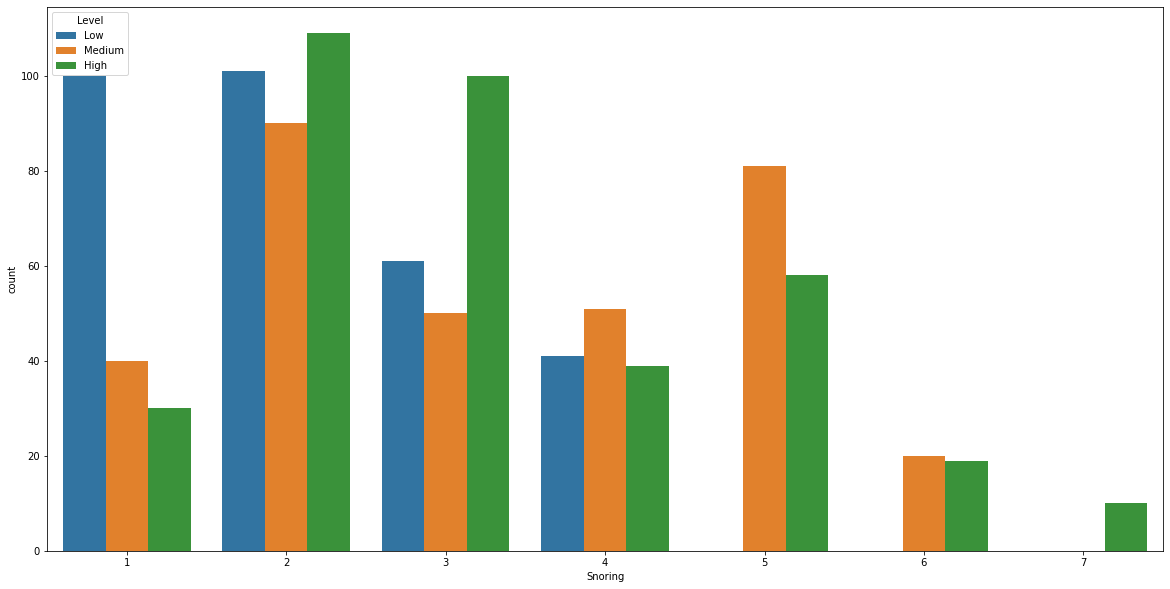

In [66]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Snoring',hue='Level',data=df)
plt.show()

# CORRELATION MATRIX TO SHOW HOW FEATURES RELATE TO EACH OTHER AND TO THE TARGET VALUE

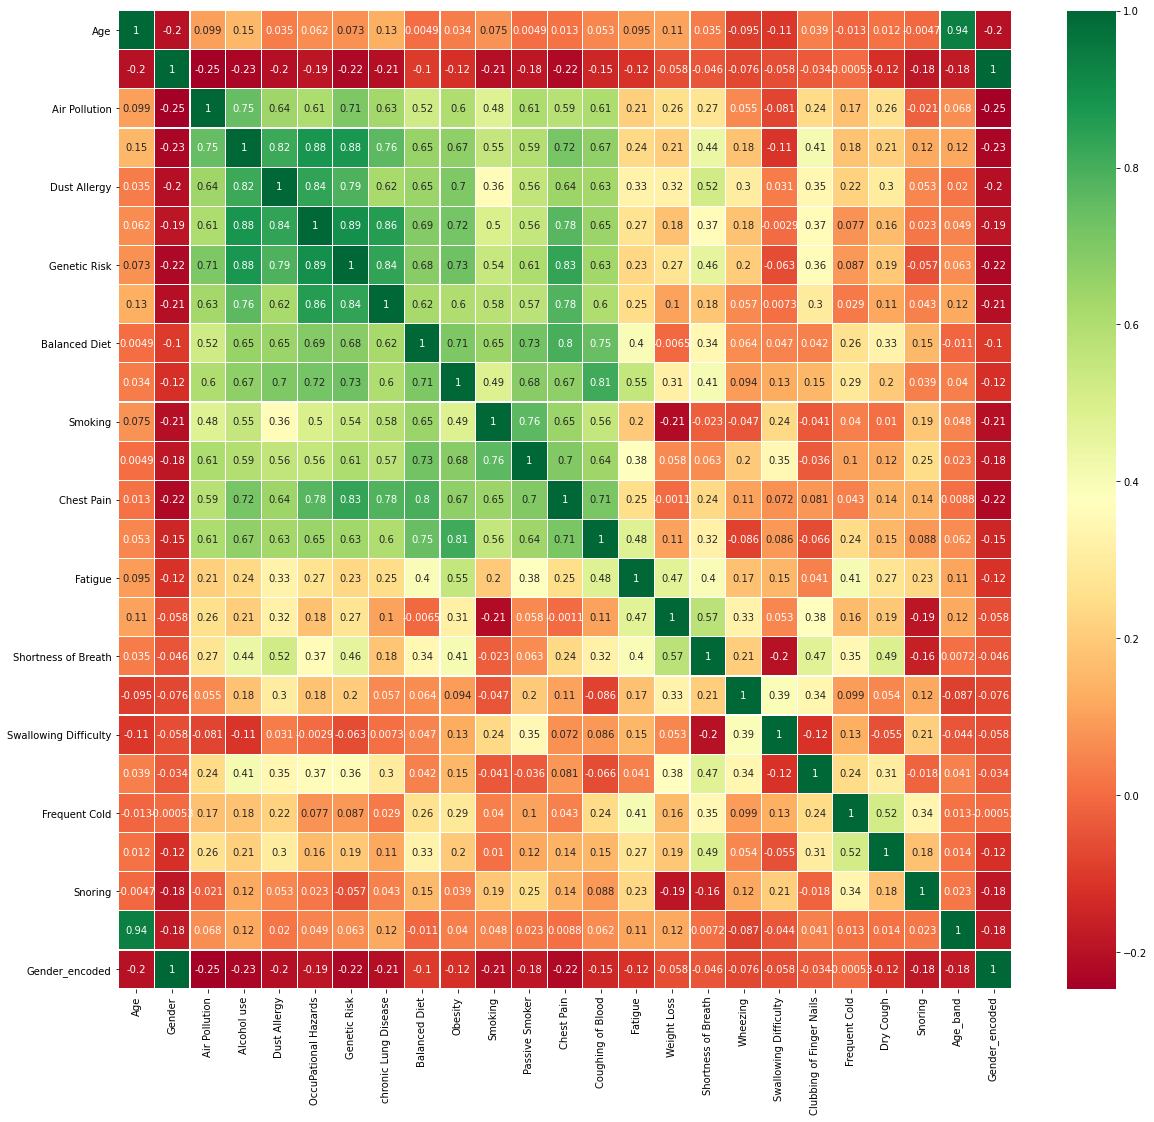

In [67]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.show()   

In [68]:
# Create simulated datset in Python:
df = pd.DataFrame(df)
# Create and print correlation matrix:
corr = df.corr()
print(corr)

                               Age    Gender  Air Pollution  Alcohol use  \
Age                       1.000000 -0.202086       0.099494     0.151742   
Gender                   -0.202086  1.000000      -0.246912    -0.227636   
Air Pollution             0.099494 -0.246912       1.000000     0.747293   
Alcohol use               0.151742 -0.227636       0.747293     1.000000   
Dust Allergy              0.035202 -0.204312       0.637503     0.818644   
OccuPational Hazards      0.062177 -0.192343       0.608924     0.878786   
Genetic Risk              0.073151 -0.222727       0.705276     0.877210   
chronic Lung Disease      0.128952 -0.205061       0.626701     0.763576   
Balanced Diet             0.004863 -0.099741       0.524873     0.653352   
Obesity                   0.034337 -0.123813       0.601468     0.669312   
Smoking                   0.075333 -0.206924       0.481902     0.547035   
Passive Smoker            0.004908 -0.184826       0.606764     0.592576   
Chest Pain  

In [69]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Age_band,Gender_encoded
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.93400,0.402000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,1.38837,0.490547
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.00000,0.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,3.00000,1.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,4.00000,1.000000


# ENCODE LEVEL OF LUNG CANCER AS 0 (LOW) OR 1 (MEDIUM & HIGH) 

In [70]:
df['Level'].replace(['High','Medium', 'Low'],[1,1,0],inplace=True)

In [71]:
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Age_band,Gender_encoded
0,P1,33,1,2,4,5,4,3,2,2,...,2,2,3,1,2,3,4,0,1,0
1,P10,17,1,3,1,5,3,4,2,2,...,7,8,6,2,1,7,2,1,0,0
2,P100,35,1,4,5,6,5,5,4,6,...,9,2,1,4,6,7,2,1,2,0
3,P1000,37,1,7,7,7,7,6,7,7,...,3,1,4,5,6,7,5,1,2,0
4,P101,46,1,6,8,7,7,7,6,7,...,4,1,4,2,4,2,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,2,7,8,2,4,5,3,1,3,0
996,P996,37,2,6,8,7,7,7,6,7,...,5,7,2,4,3,1,4,1,2,1
997,P997,25,2,4,5,6,5,5,4,6,...,9,2,1,4,6,7,2,1,0,1
998,P998,18,2,6,8,7,7,7,6,7,...,4,1,4,2,4,2,3,1,0,1


In [72]:
data = df

In [73]:
data.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level', 'Age_band', 'Gender_encoded'],
      dtype='object')

In [74]:
data.shape

(1000, 27)

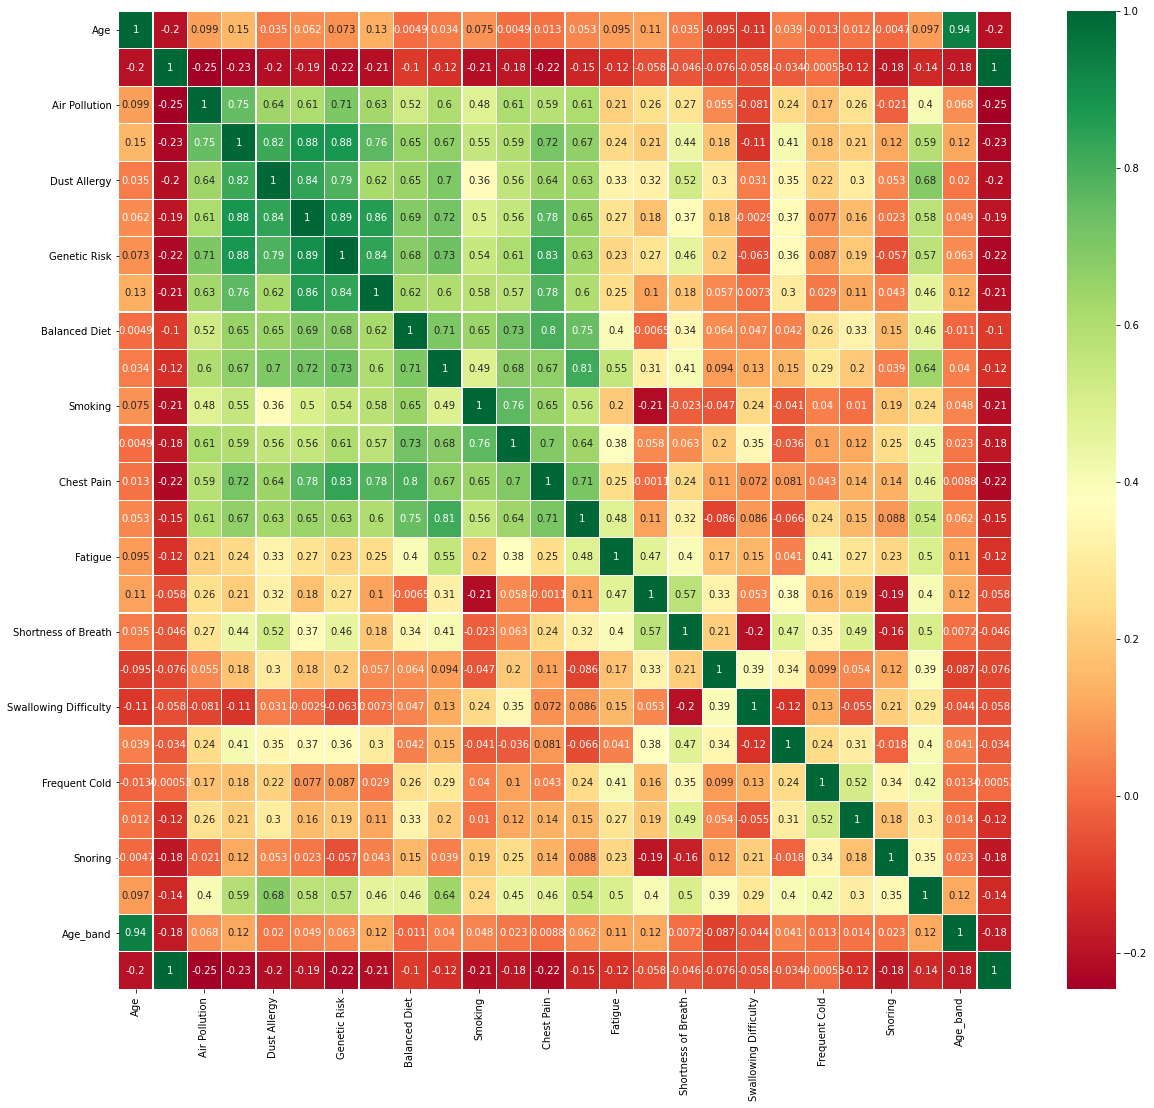

In [75]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.show()   

In [76]:
# Create simulated datset in Python:
df = pd.DataFrame(df)
# Create and print correlation matrix:
corr = df.corr()
print(corr)

                               Age    Gender  Air Pollution  Alcohol use  \
Age                       1.000000 -0.202086       0.099494     0.151742   
Gender                   -0.202086  1.000000      -0.246912    -0.227636   
Air Pollution             0.099494 -0.246912       1.000000     0.747293   
Alcohol use               0.151742 -0.227636       0.747293     1.000000   
Dust Allergy              0.035202 -0.204312       0.637503     0.818644   
OccuPational Hazards      0.062177 -0.192343       0.608924     0.878786   
Genetic Risk              0.073151 -0.222727       0.705276     0.877210   
chronic Lung Disease      0.128952 -0.205061       0.626701     0.763576   
Balanced Diet             0.004863 -0.099741       0.524873     0.653352   
Obesity                   0.034337 -0.123813       0.601468     0.669312   
Smoking                   0.075333 -0.206924       0.481902     0.547035   
Passive Smoker            0.004908 -0.184826       0.606764     0.592576   
Chest Pain  

In [77]:
y = data['Level']

In [78]:
data.groupby(['Level'])['Level'].count()

Level
0    303
1    697
Name: Level, dtype: int64

In [79]:
X = data.drop(['Patient Id', 'Age', 'Gender', 'Level'], axis=1)

In [80]:
X.columns

Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity',
       'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood',
       'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Age_band', 'Gender_encoded'],
      dtype='object')

# TOP 15 FEATURES USING CHI2

In [81]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features


                       Specs       Score
1                Alcohol use  518.093172
7                    Obesity  411.464925
11         Coughing of Blood  357.014650
2               Dust Allergy  354.672940
4               Genetic Risk  323.915554
12                   Fatigue  319.855955
14       Shortness of Breath  311.003907
3       OccuPational Hazards  304.088597
9             Passive Smoker  252.621893
10                Chest Pain  251.708881
17  Clubbing of Finger Nails  234.385794
6              Balanced Diet  215.189998
13               Weight Loss  206.540687
0              Air Pollution  173.883957
18             Frequent Cold  168.197436


In [82]:
data.shape

(1000, 27)

# Selecting Top 15 Features based on CHI2 Score

In [83]:
X2 = data[['Alcohol use', 'Obesity', 'Coughing of Blood', 'Dust Allergy', 'Genetic Risk', 'Fatigue', 'Shortness of Breath','OccuPational Hazards', 'Passive Smoker',
           'Chest Pain', 'Clubbing of Finger Nails', 'Balanced Diet', 'Weight Loss', 'Air Pollution', 'Frequent Cold']]



In [84]:
X2.shape

(1000, 15)

# Dropping First 5 Important Features

In [85]:
X3 = data.drop(['Patient Id', 'Level', 'Alcohol use', 'Obesity', 'Coughing of Blood', 'Dust Allergy', 'Genetic Risk'], axis=1)


In [86]:
X3.shape

(1000, 20)

# Feature Engineering

In [87]:
#Perform log transform on Age
df['Age_log'] = (df['Age']).transform(np.log)

In [88]:
#Numerical Column Grouping for Smoking and Passive Smoker
df['average_Smoking_PassiveSmoker'] = df[['Smoking', 'Passive Smoker']].mean(axis=1)


In [89]:
X2AllFeatures = df

In [90]:
#Binarising Wheezing 
meanWheezingCount = X2AllFeatures['Wheezing'].mean()
X2AllFeatures['Wheezing_binary']=0
X2AllFeatures.loc[X2AllFeatures['Wheezing']<=4,'Wheezing_binary']=0
X2AllFeatures.loc[(X2AllFeatures['Wheezing']>4),'Wheezing_binary']=1
X2AllFeatures['Wheezing_binary'].count()

1000

In [91]:
#Binarising Clubbing of Finger Nails
meanClubbingofFingerNails = df['Clubbing of Finger Nails'].mean()
X2AllFeatures['Clubbing of Finger Nails_binary']=0
X2AllFeatures.loc[X2AllFeatures['Clubbing of Finger Nails']<=4,'Clubbing of Finger Nails_binary']=0
X2AllFeatures.loc[(X2AllFeatures['Clubbing of Finger Nails']>4),'Clubbing of Finger Nails_binary']=1
X2AllFeatures['Clubbing of Finger Nails_binary'].count()




1000

In [92]:
df.groupby(['Clubbing of Finger Nails_binary'])['Clubbing of Finger Nails_binary'].count()

Clubbing of Finger Nails_binary
0    691
1    309
Name: Clubbing of Finger Nails_binary, dtype: int64

In [93]:
#Binarising Swallowing Difficulty 
meanSwallowingDifficulty = X2AllFeatures['Swallowing Difficulty'].mean()
X2AllFeatures['Swallowing Difficulty_binary']=0
X2AllFeatures.loc[X2AllFeatures['Swallowing Difficulty']<=4,'Swallowing Difficulty_binary']=0
X2AllFeatures.loc[(X2AllFeatures['Swallowing Difficulty']>4),'Swallowing Difficulty_binary']=1




In [94]:
df.groupby(['Swallowing Difficulty_binary'])['Swallowing Difficulty_binary'].count()

Swallowing Difficulty_binary
0    660
1    340
Name: Swallowing Difficulty_binary, dtype: int64

In [95]:
X2AllFeatures.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level', 'Age_band', 'Gender_encoded',
       'Age_log', 'average_Smoking_PassiveSmoker', 'Wheezing_binary',
       'Clubbing of Finger Nails_binary', 'Swallowing Difficulty_binary'],
      dtype='object')

In [96]:
X2AllFeatures = X2AllFeatures.drop(['Patient Id','Level', 'Gender', 'Age', 'Clubbing of Finger Nails', 'Smoking', 'Wheezing'], axis=1)



In [97]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X2AllFeatures,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2AllFeatures.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(29,'Score'))  #print 10 best features


                              Specs       Score
1                       Alcohol use  518.093172
7                           Obesity  411.464925
10                Coughing of Blood  357.014650
2                      Dust Allergy  354.672940
4                      Genetic Risk  323.915554
11                          Fatigue  319.855955
13              Shortness of Breath  311.003907
3              OccuPational Hazards  304.088597
8                    Passive Smoker  252.621893
9                        Chest Pain  251.708881
6                     Balanced Diet  215.189998
12                      Weight Loss  206.540687
0                     Air Pollution  173.883957
22                  Wheezing_binary  168.671449
15                    Frequent Cold  168.197436
21    average_Smoking_PassiveSmoker  164.998325
5              chronic Lung Disease  164.547558
14            Swallowing Difficulty  113.034126
16                        Dry Cough   99.440876
17                          Snoring   91

# FEATURE IMPORTANCE

[0.02164019 0.08789771 0.0839843  0.04261566 0.04820211 0.02794544
 0.03271305 0.08692252 0.01393944 0.03708398 0.0265362  0.05099892
 0.07194255 0.03327306 0.05446006 0.07415874 0.05230202 0.03689193
 0.03461897 0.03000525 0.04432295 0.006218   0.00132698]


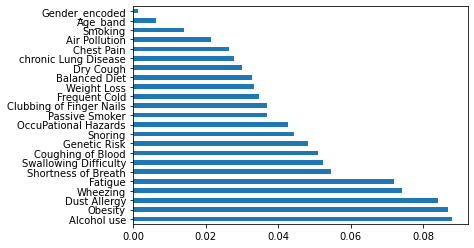

In [98]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

# TRAINING OF NEURAL NETWORK

In [99]:
import torch
from torch import nn
from torch.autograd import Variable

from torch.optim import Adam, LBFGS
from torch.utils.data import Dataset, DataLoader

In [100]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [101]:
X_tensor = torch.tensor(X.values.astype(np.float32))
y_tensor = torch.tensor(y.values.astype(np.float32))
X2_tensor = torch.tensor(X2.values.astype(np.float32))
X3_tensor = torch.tensor(X3.values.astype(np.float32))
X4_tensor = torch.tensor(X2AllFeatures.values.astype(np.float32))

In [102]:
X_tensor.shape

torch.Size([1000, 23])

In [103]:
X2_tensor.shape
X2.shape

(1000, 15)

In [104]:
X3_tensor.shape

torch.Size([1000, 20])

In [105]:
X4_tensor.shape

torch.Size([1000, 25])

# Neural Network

# Neural Network with All Features

In [106]:
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.75, random_state=5)


In [107]:
model = nn.Sequential(nn.Linear(23, 20),
                      nn.ReLU(),
                      nn.Linear(20, 40),
                      nn.ReLU(),
                      nn.Linear(40, 20),
                      nn.ReLU(),
                      nn.Linear(20, 1),
                      nn.Sigmoid())

In [108]:
criterion = torch.nn.MSELoss()

In [109]:
optimizer = torch.optim.LBFGS(model.parameters(), lr=0.01)

In [110]:
for epoch in range(250):
    # Forward Propagation
    y_pred = model(X_train)
    # Compute and print loss
    loss = criterion(y_pred, y_train)
    print('epoch: ', epoch,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward(retain_graph=True)
    #loss.backward()
    
    def closure():
                if torch.is_grad_enabled():
                    optimizer.zero_grad()
                #output = self(X_)
                if loss.requires_grad:
                    loss.backward(retain_graph=True)
                return loss
            
            #self.optim.step(closure)
            
    # Update the parameters
    optimizer.step(closure)

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:  0  loss:  0.2499360591173172
epoch:  1  loss:  0.24978680908679962
epoch:  2  loss:  0.24868744611740112
epoch:  3  loss:  0.2361377328634262
epoch:  4  loss:  0.2349124252796173
epoch:  5  loss:  0.23422126471996307
epoch:  6  loss:  0.2332978993654251
epoch:  7  loss:  0.23239757120609283
epoch:  8  loss:  0.23153407871723175
epoch:  9  loss:  0.2300334870815277
epoch:  10  loss:  0.22883789241313934
epoch:  11  loss:  0.22782966494560242
epoch:  12  loss:  0.22665338218212128
epoch:  13  loss:  0.22587059438228607
epoch:  14  loss:  0.2252434343099594
epoch:  15  loss:  0.22444231808185577
epoch:  16  loss:  0.2238404005765915
epoch:  17  loss:  0.22308513522148132
epoch:  18  loss:  0.22258679568767548
epoch:  19  loss:  0.22199080884456635
epoch:  20  loss:  0.22157534956932068
epoch:  21  loss:  0.22118404507637024
epoch:  22  loss:  0.22080008685588837
epoch:  23  loss:  0.22045336663722992
epoch:  24  loss:  0.22007033228874207
epoch:  25  loss:  0.2198297381401062
epoc

epoch:  211  loss:  0.21188855171203613
epoch:  212  loss:  0.2118826061487198
epoch:  213  loss:  0.21187756955623627
epoch:  214  loss:  0.2118721902370453
epoch:  215  loss:  0.2118656039237976
epoch:  216  loss:  0.21186020970344543
epoch:  217  loss:  0.2118554413318634
epoch:  218  loss:  0.21184971928596497
epoch:  219  loss:  0.21184450387954712
epoch:  220  loss:  0.2118394672870636
epoch:  221  loss:  0.21183384954929352
epoch:  222  loss:  0.21182894706726074
epoch:  223  loss:  0.21182452142238617
epoch:  224  loss:  0.21181951463222504
epoch:  225  loss:  0.21181528270244598
epoch:  226  loss:  0.21180729568004608
epoch:  227  loss:  0.21180368959903717
epoch:  228  loss:  0.21179832518100739
epoch:  229  loss:  0.21179315447807312
epoch:  230  loss:  0.21178726851940155
epoch:  231  loss:  0.21178239583969116
epoch:  232  loss:  0.21177826821804047
epoch:  233  loss:  0.21177442371845245
epoch:  234  loss:  0.21177057921886444
epoch:  235  loss:  0.2117670476436615
epoch:

In [111]:
pred_val = model(X_val)

In [112]:
roc_auc_score(y_val, pred_val.data.numpy())

0.8804339586088392

In [113]:
model.eval()

Sequential(
  (0): Linear(in_features=23, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=40, bias=True)
  (3): ReLU()
  (4): Linear(in_features=40, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
  (7): Sigmoid()
)

# Neural Network From the Top 15 Features Based on CHI2 Score

In [114]:
X2, X2_val, y2, y2_val = train_test_split(X2_tensor, y_tensor, test_size=0.75, random_state=5)

In [115]:
model2 = nn.Sequential(nn.Linear(15, 30),
                      nn.ReLU(),
                      nn.Linear(30, 20),
                      nn.ReLU(),
                      nn.Linear(20, 1),
                      nn.Sigmoid())

In [116]:
criterion = torch.nn.MSELoss()

In [117]:
optimizer = torch.optim.LBFGS(model2.parameters(), lr=0.01)

In [118]:
for epoch in range(250):
    # Forward Propagation
    y_pred = model2(X2)
    # Compute and print loss
    loss = criterion(y_pred, y2)
    print('epoch: ', epoch,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward(retain_graph=True)
    #loss.backward()
    
    def closure():
                if torch.is_grad_enabled():
                    optimizer.zero_grad()
                #output = self(X_)
                if loss.requires_grad:
                    loss.backward(retain_graph=True)
                return loss
            
            #self.optim.step(closure)
            
    # Update the parameters
    optimizer.step(closure)

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:  0  loss:  0.2613447904586792
epoch:  1  loss:  0.2609691023826599
epoch:  2  loss:  0.2600381076335907
epoch:  3  loss:  0.2576700747013092
epoch:  4  loss:  0.2565712630748749
epoch:  5  loss:  0.25519588589668274
epoch:  6  loss:  0.25390729308128357
epoch:  7  loss:  0.25233420729637146
epoch:  8  loss:  0.24874426424503326
epoch:  9  loss:  0.24760064482688904
epoch:  10  loss:  0.24639780819416046
epoch:  11  loss:  0.24533116817474365
epoch:  12  loss:  0.24440434575080872
epoch:  13  loss:  0.24333420395851135
epoch:  14  loss:  0.23821599781513214
epoch:  15  loss:  0.23746788501739502
epoch:  16  loss:  0.22801822423934937
epoch:  17  loss:  0.22773323953151703
epoch:  18  loss:  0.2275104522705078
epoch:  19  loss:  0.2272498458623886
epoch:  20  loss:  0.22702650725841522
epoch:  21  loss:  0.22679847478866577
epoch:  22  loss:  0.22648820281028748
epoch:  23  loss:  0.2260601669549942
epoch:  24  loss:  0.2258606255054474
epoch:  25  loss:  0.22566087543964386
epoch

epoch:  228  loss:  0.21198531985282898
epoch:  229  loss:  0.21197521686553955
epoch:  230  loss:  0.21196778118610382
epoch:  231  loss:  0.21195939183235168
epoch:  232  loss:  0.21195060014724731
epoch:  233  loss:  0.2119428962469101
epoch:  234  loss:  0.21193428337574005
epoch:  235  loss:  0.21192654967308044
epoch:  236  loss:  0.21191351115703583
epoch:  237  loss:  0.2119074910879135
epoch:  238  loss:  0.21189598739147186
epoch:  239  loss:  0.21189066767692566
epoch:  240  loss:  0.21188314259052277
epoch:  241  loss:  0.21187809109687805
epoch:  242  loss:  0.2118714153766632
epoch:  243  loss:  0.21186435222625732
epoch:  244  loss:  0.2118586301803589
epoch:  245  loss:  0.21185225248336792
epoch:  246  loss:  0.21184606850147247
epoch:  247  loss:  0.2118406891822815
epoch:  248  loss:  0.21183587610721588
epoch:  249  loss:  0.2118307501077652


In [119]:
pred2_val = model2(X2_val)

In [120]:
roc_auc_score(y2_val, pred2_val.data.numpy())

0.8722382729255985

In [121]:
model2.eval()

Sequential(
  (0): Linear(in_features=15, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
  (5): Sigmoid()
)

# Neural Network With 20 Most Important Features, Dropping the least 5

In [122]:
X3_tensor.shape

torch.Size([1000, 20])

In [123]:
X3, X3_val, y3, y3_val = train_test_split(X3_tensor, y_tensor, test_size=0.75, random_state=5)

In [124]:
model3 = nn.Sequential(nn.Linear(20, 16),
                      nn.ReLU(),
                      nn.Linear(16, 40),
                      nn.ReLU(),
                      nn.Linear(40, 20),
                      nn.ReLU(),
                      nn.Linear(20, 1),
                      nn.Sigmoid())

In [125]:
criterion = torch.nn.MSELoss()

In [126]:
optimizer = torch.optim.LBFGS(model3.parameters(), lr=0.01)

In [127]:
for epoch in range(250):
    # Forward Propagation
    y_pred = model3(X3)
    # Compute and print loss
    loss = criterion(y_pred, y3)
    print('epoch: ', epoch,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward(retain_graph=True)
    #loss.backward()
    
    def closure():
                if torch.is_grad_enabled():
                    optimizer.zero_grad()
                #output = self(X_)
                if loss.requires_grad:
                    loss.backward(retain_graph=True)
                return loss
            
            #self.optim.step(closure)
            
    # Update the parameters
    optimizer.step(closure)

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:  0  loss:  0.24657219648361206
epoch:  1  loss:  0.24621739983558655
epoch:  2  loss:  0.2455231249332428
epoch:  3  loss:  0.24325846135616302
epoch:  4  loss:  0.2410670965909958
epoch:  5  loss:  0.23871852457523346
epoch:  6  loss:  0.23698745667934418
epoch:  7  loss:  0.23462216556072235
epoch:  8  loss:  0.23332110047340393
epoch:  9  loss:  0.23245547711849213
epoch:  10  loss:  0.231080561876297
epoch:  11  loss:  0.23038996756076813
epoch:  12  loss:  0.22913038730621338
epoch:  13  loss:  0.22853337228298187
epoch:  14  loss:  0.22799578309059143
epoch:  15  loss:  0.2273951917886734
epoch:  16  loss:  0.2269667088985443
epoch:  17  loss:  0.22623024880886078
epoch:  18  loss:  0.2257193922996521
epoch:  19  loss:  0.22503562271595
epoch:  20  loss:  0.22455602884292603
epoch:  21  loss:  0.2239525467157364
epoch:  22  loss:  0.2229316085577011
epoch:  23  loss:  0.22266437113285065
epoch:  24  loss:  0.2221304327249527
epoch:  25  loss:  0.22179727256298065
epoch:  2

epoch:  225  loss:  0.21192345023155212
epoch:  226  loss:  0.21191786229610443
epoch:  227  loss:  0.21191152930259705
epoch:  228  loss:  0.21190623939037323
epoch:  229  loss:  0.21189840137958527
epoch:  230  loss:  0.2118941694498062
epoch:  231  loss:  0.21188287436962128
epoch:  232  loss:  0.21187779307365417
epoch:  233  loss:  0.21187295019626617
epoch:  234  loss:  0.2118702232837677
epoch:  235  loss:  0.21186476945877075
epoch:  236  loss:  0.21185988187789917
epoch:  237  loss:  0.2118552029132843
epoch:  238  loss:  0.21184125542640686
epoch:  239  loss:  0.2118375152349472
epoch:  240  loss:  0.211833655834198
epoch:  241  loss:  0.2118256390094757
epoch:  242  loss:  0.21175314486026764
epoch:  243  loss:  0.21175099909305573
epoch:  244  loss:  0.21174952387809753
epoch:  245  loss:  0.21174828708171844
epoch:  246  loss:  0.21174633502960205
epoch:  247  loss:  0.21174558997154236
epoch:  248  loss:  0.21174420416355133
epoch:  249  loss:  0.21174222230911255


In [128]:
pred3_val = model3(X3_val)

In [129]:
roc_auc_score(y3_val, pred3_val.data.numpy())

0.5724008389417204

In [130]:
model3.eval()

Sequential(
  (0): Linear(in_features=20, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=40, bias=True)
  (3): ReLU()
  (4): Linear(in_features=40, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
  (7): Sigmoid()
)

# Neural Network With Engineered Features

In [131]:
X4_tensor.shape

torch.Size([1000, 25])

In [132]:
X4, X4_val, y4, y4_val = train_test_split(X4_tensor, y_tensor, test_size=0.75, random_state=5)

In [133]:
model4 = nn.Sequential(nn.Linear(25, 20),
                      nn.ReLU(),
                      nn.Linear(20, 40),
                      nn.ReLU(),
                      nn.Linear(40, 20),
                      nn.ReLU(),
                      nn.Linear(20, 1),
                      nn.Sigmoid())

In [134]:
criterion = torch.nn.MSELoss()

In [135]:
optimizer = torch.optim.LBFGS(model4.parameters(), lr=0.01)

In [136]:
for epoch in range(250):
    # Forward Propagation
    y_pred = model4(X4)
    # Compute and print loss
    loss = criterion(y_pred, y4)
    print('epoch: ', epoch,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward(retain_graph=True)
    #loss.backward()
    
    def closure():
                if torch.is_grad_enabled():
                    optimizer.zero_grad()
                #output = self(X_)
                if loss.requires_grad:
                    loss.backward(retain_graph=True)
                return loss
            
            #self.optim.step(closure)
            
    # Update the parameters
    optimizer.step(closure)

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:  0  loss:  0.24676305055618286
epoch:  1  loss:  0.24664387106895447
epoch:  2  loss:  0.24539127945899963
epoch:  3  loss:  0.24268247187137604
epoch:  4  loss:  0.23268838226795197
epoch:  5  loss:  0.2313583642244339
epoch:  6  loss:  0.2305651754140854
epoch:  7  loss:  0.22966966032981873
epoch:  8  loss:  0.22824221849441528
epoch:  9  loss:  0.22694873809814453
epoch:  10  loss:  0.2255072146654129
epoch:  11  loss:  0.22461415827274323
epoch:  12  loss:  0.22389648854732513
epoch:  13  loss:  0.22258980572223663
epoch:  14  loss:  0.2219676971435547
epoch:  15  loss:  0.22134678065776825
epoch:  16  loss:  0.22051097452640533
epoch:  17  loss:  0.22006787359714508
epoch:  18  loss:  0.21971628069877625
epoch:  19  loss:  0.21891416609287262
epoch:  20  loss:  0.21865437924861908
epoch:  21  loss:  0.2184457629919052
epoch:  22  loss:  0.21814027428627014
epoch:  23  loss:  0.21790723502635956
epoch:  24  loss:  0.21768887341022491
epoch:  25  loss:  0.2174680083990097
ep

epoch:  209  loss:  0.21172675490379333
epoch:  210  loss:  0.21172355115413666
epoch:  211  loss:  0.21172043681144714
epoch:  212  loss:  0.2117181271314621
epoch:  213  loss:  0.2117159217596054
epoch:  214  loss:  0.2117130011320114
epoch:  215  loss:  0.21171075105667114
epoch:  216  loss:  0.21170873939990997
epoch:  217  loss:  0.21170614659786224
epoch:  218  loss:  0.2117041051387787
epoch:  219  loss:  0.21170151233673096
epoch:  220  loss:  0.2116994857788086
epoch:  221  loss:  0.211696594953537
epoch:  222  loss:  0.21169514954090118
epoch:  223  loss:  0.21169301867485046
epoch:  224  loss:  0.2116907835006714
epoch:  225  loss:  0.21168948709964752
epoch:  226  loss:  0.2116852104663849
epoch:  227  loss:  0.2116834819316864
epoch:  228  loss:  0.21168160438537598
epoch:  229  loss:  0.21168090403079987
epoch:  230  loss:  0.21167875826358795
epoch:  231  loss:  0.21167682111263275
epoch:  232  loss:  0.21167530119419098
epoch:  233  loss:  0.2116730511188507
epoch:  234

In [137]:
pred4_val = model4(X4_val)

In [138]:
roc_auc_score(y4_val, pred4_val.data.numpy())

0.8675550239637468

In [139]:
model4.eval()

Sequential(
  (0): Linear(in_features=25, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=40, bias=True)
  (3): ReLU()
  (4): Linear(in_features=40, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
  (7): Sigmoid()
)